<a href="https://colab.research.google.com/github/kim-jason/PowerliftingDataset/blob/main/Powerlifting_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Powerlifting Dataset EDA

Name: Jason Kim  <br>
Email: jason.s.kim20@gmail.com <br>
Linkedin: https://www.linkedin.com/in/jasonks/

## Introduction

### Overview of notebook


The purpose of this notebook is to analyze a dataset consisting of powerlifting meets in order to identify trends and insights by age, country, federation, and other provided and generated features. <br>

We will be using the CSV dataset from [OpenPowerlifting](https://openpowerlifting.gitlab.io/opl-csv/introduction.html), an open source site that regularly compiles official results from powerlifting competitions around the world. <br>

Please note that the CSV dataset is from 2022 August 6 and thus may be outdated. If interested, one can download the latest CSV dataset and use the same code.

### Overview of powerlifting

Powerlifting is a sport consisting of three specific lifts: squat, bench press, and deadlift. The sum of the best lift in each discipline determines the winner in a competition. Lifters compete in given age groups and weight categories. 

<br>

**Lift 1: Squat**
<br>
<img src='https://barbend.com/wp-content/uploads/2018/06/Ray-Williams-IPF-squat.png' width="auto" height="400">

<br>
<br>

**Lift 2: Bench Press**
<br>
<img src='https://i0.wp.com/thefitnessmaverick.com/wp-content/uploads/2018/08/0fe003b8-c421-405e-9188-90e335eb04ce-e1535429376111.jpg?fit=650%2C433&ssl=1' width="auto" height="400">

<br>
<br>

**Lift 3: Deadlift**
<br>
<img src='https://static01.nyt.com/images/2017/07/09/nyregion/09FITCITY1/09FITCITY1-videoSixteenByNineJumbo1600.jpg' width="auto" height="400">







## Data import

In [1]:
# Import libraries used in the notebook
import pandas as pd
from datetime import datetime, timedelta
import math
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
# Download the raw CSV dataset (note I saved this CSV file to my personal Google Drive as it makes it faster to download and use in Google Colab)
! gdown --id 1b15_F2lH2sHI02m7F1HGQkDw3Bl25-X9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1b15_F2lH2sHI02m7F1HGQkDw3Bl25-X9
To: /content/openpowerlifting-2022-08-06-98216f16.csv
100% 540M/540M [00:02<00:00, 252MB/s]


In [3]:
# Create dataframe with the raw CSV dataset
df = pd.read_csv('openpowerlifting-2022-08-06-98216f16.csv')
df.head()
print(len(df))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2755243


In [4]:
# Describe the contents of the dataframe
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,1720150.0,2719385.0,710550.0,702587.0,682372.0,7313.0,1821444.0,1158272.0,1144372.0,1107394.0,...,810608.0,795214.0,759616.0,19399.0,1970884.0,2564651.0,2541034.0,2541034.0,2541034.0,2318067.0
mean,30.8,84.1,113.5,95.8,36.6,75.7,174.3,83.5,56.3,-16.5,...,159.6,131.8,20.7,80.1,189.1,375.4,273.0,272.0,256.5,63.9
std,13.2,22.7,140.2,164.7,193.0,182.8,69.0,101.3,126.2,141.0,...,108.3,157.4,211.4,187.3,62.2,206.0,129.6,129.1,122.7,16.3
min,0.0,10.0,-555.0,-580.0,-600.5,-550.0,-508.0,-515.0,-589.7,-575.0,...,-461.0,-502.5,-587.5,-500.0,-410.0,1.0,0.7,0.7,0.6,0.5
25%,20.5,67.1,90.0,75.0,-155.0,-88.0,122.5,55.0,-45.0,-135.0,...,125.0,115.0,-202.5,-75.5,140.0,200.0,141.6,141.0,133.5,52.2
50%,27.5,81.9,145.0,145.0,115.0,131.0,170.0,105.0,95.0,-60.0,...,180.0,177.5,120.0,142.9,188.2,351.5,294.6,293.6,274.1,63.6
75%,38.5,98.8,200.0,202.5,192.5,198.5,217.7,145.0,145.0,117.5,...,224.5,230.0,205.0,206.4,235.0,530.7,371.1,369.5,350.0,75.2
max,98.0,300.0,555.0,577.5,595.0,592.4,595.0,551.0,500.0,577.5,...,450.0,467.5,487.5,440.5,487.5,1407.5,795.2,793.3,756.9,167.5


In [5]:
# Confirm datatypes of the features
df.dtypes

Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested               object
Country              object
State                object
Federation           object
ParentFederation    

In [6]:
# Update Date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Name                        object
Sex                         object
Event                       object
Equipment                   object
Age                        float64
AgeClass                    object
BirthYearClass              object
Division                    object
BodyweightKg               float64
WeightClassKg               object
Squat1Kg                   float64
Squat2Kg                   float64
Squat3Kg                   float64
Squat4Kg                   float64
Best3SquatKg               float64
Bench1Kg                   float64
Bench2Kg                   float64
Bench3Kg                   float64
Bench4Kg                   float64
Best3BenchKg               float64
Deadlift1Kg                float64
Deadlift2Kg                float64
Deadlift3Kg                float64
Deadlift4Kg                float64
Best3DeadliftKg            float64
TotalKg                    float64
Place                       object
Dots                       float64
Wilks               

Here is a description of each feature in the provided dataset. Additional details for each feature can be found [here](https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html). 

*   **Name**: Name of the lifter
*   **Sex**: Sex category in which the lifter competed (M, F, or Mx)
*   **Event**: The type of competition that the lifter entered (SBD, BD, SD, SB, S, B, D)
*   **Equipment**: Equipment category under which the lifts were performed (Raw, Wraps, Single-ply, Multi-ply, Unlimited, Straps)
*   **Age**: Age of the lifter on the start date of the meet
*   **AgeClass**: Age class in which the filter falls, based on exact age of the lifter on the day of the competition
*   **BirthYearClass**: Birth year class in which the filter falls
*   **Division**: Division of competition
*   **BodyweightKg**: Recorded bodyweight of the lifter at the time of competition
*   **WeightClassKg**: Weight class in which the lifter competed
*   **Squat1Kg, Bench1Kg, Deadlift1Kg**: First attempts for each of squat, bench, and deadlift, respectively
*   **Squat2Kg, Bench2Kg, Deadlift2Kg**: Second attempts for each of squat, bench, and deadlift, respectively
*   **Squat3Kg, Bench3Kg, Deadlift3Kg**: Third attempts for each of squat, bench, and deadlift, respectively
*   **Squat4Kg, Bench4Kg, Deadlift4Kg**: Fourth attempts for each of squat, bench, and deadlift, respectively
*   **Best3SquatKg, Best3BenchKg, Best3DeadliftKg**: Maximum of the first three successful attempts for the lift
*   **TotalKg**: Sum of Best3SquatKg, Best3BenchKg, and Best3DeadliftKg, if all three lifts were a success
*   **Place**: Recorded place of the lifter in the given division at the end of the meet
*   **Dots**: Dots points (formula used to assess strength of lifter)
*   **Wilks**: Wilks points (formula used to assess strength of lifter)
*   **Glossbrenner**: Glossbrenner points (formula used to assess strength of lifter)
*   **Goodlift**: IPF GL points (formula used to assess strength of lifter)
*   **Tested**: Yes if the lifter entered a drug-tested category, empty otherwise
*   **Country**: Home country of the lifter
*   **State**: Home state/province/oblast/division/etc of the lifter
*   **Federation**: The federation that hosted the meet
*   **ParentFederation**: Topmost federation that sanctioned the meet, usually the international body
*   **Date**: Start date of the meet
*   **MeetCountry**: Country in which the meet was held
*   **MeetState**: State, province, or region in which the meet was held
*   **MeetName**: Name of the meet

## Data cleaning

### Missing, incorrect, and unneeded data


We will go through the different features to handle missing, incorrect, and unneeded data.

In [7]:
# See the prevalence of missing data within our current features
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data)

,Total,Percent
Squat4Kg,2747930,0.997346
Bench4Kg,2736202,0.993089
Deadlift4Kg,2735844,0.992959
State,2245365,0.814943
Squat3Kg,2072871,0.752337
Squat2Kg,2052656,0.745000
Squat1Kg,2044693,0.742110
Deadlift3Kg,1995627,0.724302
Deadlift2Kg,1960029,0.711382
Deadlift1Kg,1944635,0.705794


It is expected that there will be missing data for several features, such as the bench, squat, and deadlift features (some competitions do not include all three lifts), as well as the state and country features. 

In [8]:
# Create a copy of the original dataframe 
cleaned_df = df.copy(deep=True)

#### Age feature

One feature that seems fairly high in missing data is age. We will try to clean and impute data for this feature. This feature is important for several analyses, including progression over time by lifters, maximum lifts by age, etc. 

We will first remove rows that have ages less than 14. Firstly, according to the [2022 technical rulebook](https://www.powerlifting.sport/rules/codes/info/technical-rules) of the International Powerlifting Federation, the largest powerlifting federation in the world, the minimum age is 14. Secondly, although other federations permit "youth" or "junior" categories for those under 14, given the purpose of this dataset is to provide insights for adults and because there are significant physical differences between youths and adults given puberty, I will filter out those under 14.

In [9]:
# Remove rows in which age is less than 14
cleaned_df = cleaned_df[(cleaned_df['Age'] >= 14) | (cleaned_df['Age'].isnull())]

# Visualize the missing rows for age
null_age_df = cleaned_df[cleaned_df['Age'].isnull()]
display(null_age_df.head(5))

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
266,Rosimeire Santos Souza,F,B,Raw,NaN,45-49,NaN,F 45-49,56.0,56,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
267,João Vitor Rodrigues Claro,M,B,Raw,NaN,13-15,NaN,MT 13-15,56.0,56,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
269,Eduardo Haggar da Silva,M,B,Raw,NaN,13-15,NaN,MT 13-15,60.0,60,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
270,Murieu Moreira Moreno,M,B,Raw,NaN,13-15,NaN,MT 13-15,75.0,75,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
271,Gabriel Schineider da Silva,M,B,Raw,NaN,20-23,NaN,MJ,67.5,67.5,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra


We will also check if there are any rows in which the Age does not fit the appropriate AgeClass and/or BirthYearClass. For example, a lifter with Age 14 can compete in the BirthYearClass of 13-15 but cannot compete in the BirthYearClass of 20-23.

We can see that there are a total of 196,458 rows with invalid AgeClass and/or BirthYearClass entries for the Age. This is 7% of the total dataset. As the AgeClass and BirthYearClass categories are variable by each competition and since we can artificially create our own AgeClass and BirthYearClass categories for analysis, we will set these two features as null for these invalid rows.

In [10]:
# Remove rows in which the Age does not fit the appropriate AgeClass and/or BirthYearClass
def verify_age(x):
  if not math.isnan(x['Age']):
    if len(str(x['AgeClass'])) > 0 and '-' in str(x['AgeClass']):
      min, max = x['AgeClass'].split('-')
      if not (float(x['Age']) >= float(min) and float(x['Age'] <= float(max))):
        return False
      else:
        return True
    elif len(str(x['BirthYearClass'])) > 0 and '-' in str(x['BirthYearClass']):
      min, max = x['BirthYearClass'].split('-')
      if not (float(x['Age']) >= float(min) and float(x['Age'] <= float(max))):
        return False
      else:
        return True
    else:
      return True
  else:
    return True

cleaned_df['Age_verified'] = cleaned_df.apply(verify_age, axis=1)
print(len(cleaned_df[cleaned_df['Age_verified'] == False]))
print(len(cleaned_df))

# Set the AgeClass and BirthYearClass of rows with invalid ages to null
cleaned_df.loc[cleaned_df.Age_verified == False, ['AgeClass']] = None
cleaned_df.loc[cleaned_df.Age_verified == False, ['BirthYearClass']] = None

cleaned_df = cleaned_df.drop(['Age_verified'], axis=1)

196458
2728795


We will now attempt to impute missing data entries for age in two methods:


1.   Use a lifter's age from a different competition entry to calculate their age for other competitions
2.   Use the average of their AgeClass range or their BirthYearClass range



In [11]:
# First method for data imputation for age

# Use a lifter's age from a different competition entry to calculate their age for other competitions 
lifters_missing_age = cleaned_df[cleaned_df['Age'].isnull()][['Name', 'Date']]
lifters_missing_age = lifters_missing_age.rename(columns={'Date':'Date_missing'})
lifters_missing_age = lifters_missing_age.drop_duplicates(subset=['Name', 'Date_missing'])

# Sort original dataset to find a row with an existing Age and Date to calculate birthday
df = df.sort_values(['Age', 'Date'])
lifters_missing_age = pd.merge(lifters_missing_age, cleaned_df[['Name', 'Age', 'Date']].drop_duplicates(subset=['Name']), on='Name', how='inner')
lifters_missing_age = lifters_missing_age.rename(columns={'Age':'Age_existing', 'Date':'Date_existing'})
lifters_missing_age = lifters_missing_age[(lifters_missing_age['Age_existing'].notnull()) & (lifters_missing_age['Date_existing'].notnull())]
lifters_missing_age['Age_missing'] = lifters_missing_age['Date_missing'] - (lifters_missing_age['Date_existing'] - lifters_missing_age['Age_existing'].apply(lambda x: timedelta(seconds=x*(60*60*24*365))))
lifters_missing_age['Age_missing'] = lifters_missing_age['Age_missing'].apply(lambda x: round((x.total_seconds() / 60 / 60 / 24 / 365.25)*2)/2) # We round to the nearest 0.5 increment as the original dataset did this

display(lifters_missing_age)

,Name,Date_missing,Age_existing,Date_existing,Age_missing
58,Gelson de Oliveira,2017-05-13,39.0,2021-07-09,35.0
59,Gelson de Oliveira,2018-04-14,39.0,2021-07-09,35.5
60,Gelson de Oliveira,2018-11-25,39.0,2021-07-09,36.5
61,Gelson de Oliveira,2017-08-27,39.0,2021-07-09,35.0
62,Gelson de Oliveira,2017-09-09,39.0,2021-07-09,35.0
...,...,...,...,...,...
982863,Anna Śliwińska,2004-08-09,18.5,2001-11-28,21.0
982865,Viktoriya Olenytsya,2004-08-09,18.5,2003-02-26,20.0
982871,Rémi Bhang,2004-08-09,22.5,2007-06-12,19.5
982877,Dmitriy Dvornikov,2004-08-09,19.5,2002-11-21,21.0


In [12]:
# Merge with the original dataframe to add in the estimated ages
cleaned_df = pd.merge(cleaned_df, lifters_missing_age[['Name', 'Date_missing', 'Age_missing']], how='left', left_on=['Name', 'Date'], right_on=['Name', 'Date_missing'])
cleaned_df.loc[cleaned_df.Age.isnull() & cleaned_df.Date_missing.notnull() & cleaned_df.Age_missing.notnull(), ['Age']] = cleaned_df['Age_missing']
cleaned_df = cleaned_df.drop(['Date_missing', 'Age_missing'], axis=1)

# Remove any estimated ages that are inaccurate based on the provided AgeClass and BirthYearClass and set them to null
cleaned_df['Age_verified'] = cleaned_df.apply(verify_age, axis=1)
cleaned_df.loc[cleaned_df.Age_verified == False, ['Age']] = None
cleaned_df = cleaned_df.drop(['Age_verified'], axis=1)

display(cleaned_df.head(5))

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,None,None,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [13]:
# Second method for data imputation for age

# Use the average of the lifters's AgeClass range or the BirthYearClass range to estimate remaining missing ages
def get_average_age(x):
  if math.isnan(x['Age']):
    if len(str(x['AgeClass'])) > 0 and '-' in str(x['AgeClass']):
      min, max = x['AgeClass'].split('-')
      average = (float(min) + float(max)) / 2.0
      return round(average * 2) / 2
    elif len(str(x['BirthYearClass'])) > 0 and '-' in str(x['BirthYearClass']):
      min, max = x['BirthYearClass'].split('-')
      average = (float(min) + float(max)) / 2.0
      return round(average * 2) / 2
    else:
      return x['Age']
  else:
    return x['Age']
cleaned_df['Age'] = cleaned_df.apply(get_average_age, axis=1)

display(cleaned_df)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,None,None,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728790,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,84+,...,Yes,Ukraine,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2728791,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,84+,...,Yes,Hungary,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2728792,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,84+,...,Yes,Netherlands,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2728793,Kelly Phasey,F,SBD,Single-ply,39.5,None,None,Open,124.53,84+,...,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships


We can see that there are some estimated ages that are less than 14, which again is the minimum age to compete. This suggests that the entries with missing ages had incorrect dates, the entries with existing ages and dates are incorrect, or the entries are from youth competitions. As the 9,330 estimated rows are only 0.3% of the remaining dataset of 2,728,795 rows, we will simply remove these rows from the remaining dataset. Note that this cleaned dataset (cleaned_df) will be used for analyses involving age and dates, but we can use the original dataset (df) for other analyses that don't require accurate ages and dates.

We can confirm all data entries now have recorded or estimated ages.

In [14]:
# Remove data entries with estimated or recorded ages below the minimum threshold of 14
print(len(cleaned_df[cleaned_df['Age'] < 14]))
print(len(cleaned_df))
cleaned_df = cleaned_df[cleaned_df['Age'] >= 14]

# Confirm all remaining data entries have recorded or imputed ages
print(len((cleaned_df[cleaned_df['Age'].isnull()])))

9330
2728795
0


We will also remove estimated ages above 105 as it can be safely assumed those are not realistic ages for competitive powerlifters. Online research also suggests that the age 105 is an appropriate threshold, as [Edith Traina](https://barbend.com/100-year-old-edith-murway-traina-powerlifter-guinness/) was recently entered into the 2022 Guinness Book of Records as the oldest competitive female powerlifter ever at the age of 100 in 2021. We can see that her entries are included below.

Below we can see several of the rows in which the age estimations are to be removed. For example, Gerald Foster is estimated to be 539.5 years old, as this data was imputed by taking the average of his AgeClass of 80-999. 

The age feature should now be cleaned.

In [15]:
cleaned_df = cleaned_df.sort_values(by='Age', ascending=False)
display(cleaned_df.head(5))

display(cleaned_df[cleaned_df['Name'] == 'Edith Traina'].head(5))

cleaned_df = cleaned_df[cleaned_df['Age'] <= 105]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
2026130,Edward E. Brown,M,B,Raw,539.5,80-999,70-999,Amateur Masters 80-84,99.34,100,...,Yes,USA,NY,RPS,NaN,2020-02-08,USA,VT,Fair Haven,Vermont Winter Classic
2007821,Jack Stinson,M,SBD,Wraps,539.5,80-999,70-999,Amateur Masters 85-89,88.36,90,...,Yes,USA,NH,RPS,NaN,2015-12-05,USA,VT,Fair Haven,Power Wars
2248944,Charles Vause,M,B,Raw,539.5,80-999,70-999,Masters 80-84,75.00,75,...,Yes,USA,HI,WABDL,NaN,2018-07-01,USA,HI,NaN,Sonny's 14th Annual Classic
2247171,Edwin Free Jr,M,B,Multi-ply,539.5,80-999,70-999,Masters 80-84,89.72,90,...,Yes,USA,TN,WABDL,NaN,2005-11-16,USA,NV,Las Vegas,World Championships
105835,George Matthews,M,B,Raw,539.5,80-999,70-999,M 80-84,89.00,90,...,NaN,USA,NaN,APC,WUAP,2017-06-24,USA,GA,Gainesville,15th Annual Nationals


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
2214450,Edith Traina,F,B,Raw,98.0,80-999,70-999,Open,67.50,67.5,...,NaN,NaN,NaN,RAWU,NaN,2019-11-10,USA,FL,Tampa,Tony Conyers Extravaganza
2214011,Edith Traina,F,BD,Raw,97.0,80-999,70-999,SNR,75.00,75,...,NaN,NaN,NaN,RAWU,NaN,2018-09-15,USA,FL,Tampa,Push/Pull
2215788,Edith Traina,F,D,Raw,96.0,80-999,70-999,SNR,75.00,75,...,NaN,NaN,NaN,RAWU,NaN,2018-06-08,USA,FL,Tampa,Grip it and Rip it Deadlift Contest
2213855,Edith Traina,F,B,Raw,96.0,80-999,70-999,95-99,67.13,67.5,...,NaN,NaN,NaN,RAWU,NaN,2017-12-30,USA,FL,Mount Dora,Beasty Bash
2214521,Edith Traina,F,BD,Raw,94.5,80-999,70-999,90-94,75.00,75,...,NaN,NaN,NaN,RAWU,NaN,2016-09-23,USA,FL,Tampa,Tony Conyers Extravaganza


#### BodyweightKg feature

Next, we will see if the BodyweightKg feature has any data that could be potentially inaccurate.

We will first check minimum BodyweightKg to assess if it is realistic.

In [16]:
print(cleaned_df['BodyweightKg'].min())

cleaned_df = cleaned_df.sort_values(by='BodyweightKg')
display(cleaned_df.head(20))

10.0


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
1330257,R. Honahan,M,SBD,Single-ply,62.0,60-64,60-69,60-64,10.00,10,...,NaN,NaN,NaN,USPF,IPF,1985-03-10,USA,CA,Los Angeles,Senior Olympics Powerlifting
2119154,Ziphokonke Cele,F,SBD,Wraps,18.0,18-19,NaN,F-T3,18.00,44,...,NaN,South Africa,NaN,GPC,GPC,2019-11-10,South Africa,NaN,Durban,RPC Record Breakers
2673060,Artem Sultanov,M,B,Raw,14.0,13-15,14-18,Amateur Teen 14-15,22.50,52,...,Yes,Russia,NaN,NAP,IPA,2015-10-16,Russia,SVE,Ekaterinbourg,Golden Tiger 9
1218593,Angelia Aguirre,F,B,Multi-ply,14.0,13-15,NaN,F_TEM_1_AAPF,24.95,44,...,NaN,NaN,NaN,APF,WPC,2002-04-06,USA,FL,Gulf Breeze,Amateur Nationals
2024187,Dávid Barabás,M,SBD,Raw,29.0,24-34,24-39,Amateur Open,24.95,52,...,Yes,Hungary,NaN,RPS,NaN,2017-08-12,USA,KY,Paducah,Braggin Rights
1577453,Gonçalo Teixeira,M,D,Raw,14.0,13-15,NaN,T 13-15,25.00,52,...,NaN,Portugal,NaN,WPC,WPC,2013-06-02,Portugal,NaN,Vila do Conde,European Championships
951672,Erin Shaw,F,SBD,Wraps,14.0,13-15,14-18,FT1R,25.00,44,...,NaN,NaN,NaN,UPA,NaN,2013-04-20,USA,IA,Dubuqe,Powerlifting & Bench Press Nationals
1076456,Brett Johns #2,M,SBD,Wraps,16.5,16-17,NaN,Youth,25.30,48,...,Yes,Australia,SA,AAPLF,IPF,1977-01-01,Australia,NaN,NaN,Australian Postal Youth Championships
2073569,Darnell Floyd,M,B,Raw,14.0,13-15,14-18,RT 14-15,25.63,44,...,Yes,USA,NC,AAU,NaN,2002-05-10,USA,VA,Richmond,Triple Crown & Virginia State & Old Dominion B...
2016718,Zachary Bradley,M,BD,Raw,14.0,13-15,14-18,Amateur Teen 14-15,26.49,52,...,Yes,NaN,NaN,RPS,NaN,2017-08-20,USA,MA,Norton,Southern Mass Blast IV


After sorting the dataset by BodyweightKg, we can see that the majority of the lightest lifters are younger. Although this makes logical sense, we can see that some of these BodyweightKg inputs are not realistic. According to the [CDC](https://www.cdc.gov/growthcharts/html_charts/wtage.htm#males), the third percentile weights for a 14 year old female and male are 36.7 kg and 37.1 kg, respectively. As we know that 14 is the minimum age and that competitive lifters are most likely much heavier than the third percentile (and most likely more than the fiftieth percentile for that matter), we can assume these rows do not contain accurate BodyweightKg data. We will remove the 280 rows that contain BodyweightKg less than 36.7 kg. This is negigible compared to the remaining dataset of 2,042,840 rows and thus should not have a significant effect.

In [17]:
print(len(cleaned_df[cleaned_df['BodyweightKg'] < 36.7]))
print(len(cleaned_df))

cleaned_df = cleaned_df[(cleaned_df['BodyweightKg'] >= 36.7) | (cleaned_df['BodyweightKg'].isnull())]

280
2042840


We will now check maximum BodyweightKg to assess if it is realistic.

In [18]:
print(cleaned_df['BodyweightKg'].max())

cleaned_df = cleaned_df.sort_values(by='BodyweightKg', ascending=False)
display(cleaned_df.head(20))

300.0


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
2166487,Les Wroe,M,D,Raw,33.0,24-34,24-39,Pro Open,300.00,NaN,...,NaN,Australia,NaN,MM-AUS,MM,2022-06-18,Australia,QLD,Fordsdale,Redemption
1048288,James Simmons #1,M,B,Raw,31.0,24-34,24-39,M_OR_AAPF,260.20,140+,...,Yes,NaN,NaN,APF,WPC,2019-07-27,USA,IL,Chicago,Summer Bash
1628925,Dmitriy Vasin,M,SBD,Single-ply,32.5,24-34,24-39,Open,260.00,125+,...,Yes,Russia,NaN,FPR,IPF,2009-12-12,Russia,MOW,Balashikha,Balashikha Powerlifting Championships
303331,Jousha Sprouse,M,SBD,Raw,33.5,24-34,24-39,MR-SO,258.00,120+,...,Yes,USA,GA,USAPL,IPF,2018-04-14,USA,GA,NaN,Georgia Spring Open
1577818,Jeff Lewis #1,M,SBD,Multi-ply,35.0,NaN,NaN,Open,250.05,140+,...,NaN,USA,NaN,WPC,WPC,2005-10-29,USA,IL,Chicago,WPO Semifinals
2382186,Ruben Leal,M,SBD,Single-ply,16.5,16-17,14-18,Boys,249.48,124.7+,...,Yes,NaN,NaN,THSPA,NaN,2019-02-28,USA,TX,Bishop,Boys Region 5 Division 3
1576648,Jeff Lewis #1,M,SBD,Multi-ply,36.0,NaN,NaN,Open,245.50,125+,...,NaN,USA,NaN,WPC,WPC,2006-11-02,USA,NY,Lake George,World Championships - WPO Semi-Finals
1510931,Jeff Lewis #1,M,SBD,Single-ply,37.0,NaN,NaN,M-HW,245.00,125+,...,Yes,USA,NaN,USAPL,IPF,2008-03-01,USA,OH,Columbus,Quest Pro Invitational
415656,Peter Smith,M,B,Raw,48.5,45-49,40-49,MR-PF,245.00,120+,...,Yes,USA,FL,USAPL,IPF,2020-07-05,USA,FL,NaN,9th Annual Central Florida Open Championships
1493148,Jeff Lewis #1,M,B,Single-ply,43.0,40-44,40-49,M-O,245.00,120+,...,Yes,USA,NaN,USAPL,IPF,2013-08-17,USA,GA,Atlanta,Bench Press Nationals


We can see that BodyweightKg of 260 kg is feasible for competitive powerlifters. For example, Jeff Lewis (recorded as a BodyweightKg of 245.50 kg) can be verified to have such a high weight from other online [sources](https://www.strengthfighter.com/biggest-heaviest-powerlifter-jeff-lewis/). However, the maximum BodyweightKg of 300 kg attributed to Les Wroe can be assumed to be an inaccurate data entry (given that his BodyweightKg recorded in other competitions are all much lower) and thus can be removed.

In [19]:
display(df[df['Name'] == 'Les Wroe'].sort_values(by='BodyweightKg', ascending=False).head(5))

cleaned_df = cleaned_df[(cleaned_df['BodyweightKg'] <= 270) | (cleaned_df['BodyweightKg'].isnull())]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
2188520,Les Wroe,M,D,Raw,33.0,24-34,24-39,Pro Open,300.0,NaN,...,NaN,Australia,NaN,MM-AUS,MM,2022-06-18,Australia,QLD,Fordsdale,Redemption
2188526,Les Wroe,M,B,Unlimited,32.0,24-34,24-39,Open,156.0,140+,...,NaN,Australia,NaN,MM-AUS,MM,2021-05-15,Australia,QLD,Brisbane,Tormented Force
2188655,Les Wroe,M,SBD,Unlimited,32.0,24-34,24-39,Open,152.1,140+,...,NaN,Australia,NaN,MM-AUS,MM,2021-10-03,Australia,QLD,NaN,Hell's Gate
2182467,Les Wroe,M,B,Raw,31.0,24-34,24-39,MO-R,150.1,140+,...,NaN,Australia,NaN,CAPO,GPA,2021-01-30,Australia,QLD,Bowen Hills,Queensland Bench Only Championships
2188516,Les Wroe,M,B,Unlimited,33.0,24-34,24-39,Pro Open,149.7,NaN,...,NaN,Australia,NaN,MM-AUS,MM,2022-06-18,Australia,QLD,Fordsdale,Redemption




Next, we will check that all competitors are competing in appropriate weight classes. For example, an athlete with a WeightClassKg of 75 should have a BodyweightKg less than or equal to 75; an athlete with a WeightClassKg of 100+ should have a BodyweightKg greater than or equal to 100.

We can see that 24,815 rows have invalid or null WeightClassKg data, which is 1% of the remaining dataset of 2,042,559 rows. We will use the same logic as with AgeClass and BirthYearClass – given the WeightClassKg categories differ by competition and we can create artificial categories during analysis, we will just update these invalid WeightClassKg rows to null.

In [20]:
def validate_weightclasskg(x):
  if len(str(x['WeightClassKg'])) > 0:
    if '+' in str(x['WeightClassKg']):
      if len(str(x['WeightClassKg'])) > 1:
        min, _ = x['WeightClassKg'].split('+')
        return float(x['BodyweightKg']) >= float(min)
      else:
        return True
    else:
      return float(x['BodyweightKg']) <= float(x['WeightClassKg'])
  else:
    return True

cleaned_df['Valid_WeightClassKg'] = cleaned_df.apply(validate_weightclasskg, axis=1)
print(len(cleaned_df))
print(len(cleaned_df[cleaned_df['Valid_WeightClassKg'] == False]))
display(cleaned_df[cleaned_df['Valid_WeightClassKg'] == False].head(5))

cleaned_df.loc[cleaned_df.Valid_WeightClassKg == False, ['WeightClassKg']] = None
cleaned_df = cleaned_df.drop(['Valid_WeightClassKg'], axis=1)
display(cleaned_df)

2042559
40822


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Valid_WeightClassKg
623629,Robert Wilkerson,M,B,Raw,30.0,24-34,24-39,Open,199.58,NaN,...,USA,NaN,Hardcore,NaN,2012-03-31,USA,TX,Dallas,Kings of the Bench VI,False
623249,Robert Wilkerson,M,D,Raw,30.0,24-34,24-39,Open,199.58,NaN,...,USA,NaN,Hardcore,NaN,2012-03-31,USA,TX,Dallas,Clash of the Titans V,False
623569,Robert Wilkerson,M,S,Wraps,30.0,24-34,24-39,Open,199.58,NaN,...,USA,NaN,Hardcore,NaN,2012-03-31,USA,TX,Dallas,Sultans of the Squat,False
623256,Robert Wilkerson,M,SBD,Wraps,30.0,24-34,24-39,Open,199.58,NaN,...,USA,NaN,Hardcore,NaN,2012-03-31,USA,TX,Dallas,Clash of the Titans V,False
623260,Pedro Mejias,M,B,Raw,33.0,24-34,24-39,Open,195.50,NaN,...,USA,NaN,Hardcore,NaN,2012-10-20,USA,NV,Las Vegas,Kings of the Bench VIII,False


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
1048288,James Simmons #1,M,B,Raw,31.0,24-34,24-39,M_OR_AAPF,260.20,140+,...,Yes,NaN,NaN,APF,WPC,2019-07-27,USA,IL,Chicago,Summer Bash
1628925,Dmitriy Vasin,M,SBD,Single-ply,32.5,24-34,24-39,Open,260.00,125+,...,Yes,Russia,NaN,FPR,IPF,2009-12-12,Russia,MOW,Balashikha,Balashikha Powerlifting Championships
303331,Jousha Sprouse,M,SBD,Raw,33.5,24-34,24-39,MR-SO,258.00,120+,...,Yes,USA,GA,USAPL,IPF,2018-04-14,USA,GA,NaN,Georgia Spring Open
1577818,Jeff Lewis #1,M,SBD,Multi-ply,35.0,NaN,NaN,Open,250.05,140+,...,NaN,USA,NaN,WPC,WPC,2005-10-29,USA,IL,Chicago,WPO Semifinals
2382186,Ruben Leal,M,SBD,Single-ply,16.5,16-17,14-18,Boys,249.48,124.7+,...,Yes,NaN,NaN,THSPA,NaN,2019-02-28,USA,TX,Bishop,Boys Region 5 Division 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124828,Emily Walther,F,SBD,Single-ply,14.0,13-15,14-18,Teen 14-15,NaN,None,...,NaN,USA,NaN,WPF,NaN,1999-12-17,USA,NV,Las Vegas,World Championships
1484534,Samantha Füßler,F,D,Single-ply,14.0,13-15,14-18,Youth B,NaN,None,...,Yes,Germany,NaN,BVDK,IPF,2016-12-03,Germany,NaN,Greifswald,Deutsche Meisterschaft im Kreuzheben
38109,Isabella Dupont,F,B,Raw,14.0,13-15,14-18,Teen 14-15,NaN,None,...,Yes,USA,RI,RAW,NaN,2014-03-15,USA,MA,Peabody,March Madness
1144634,P. McCarty,M,SBD,Single-ply,14.0,13-15,14-18,Teen 14-15,NaN,None,...,NaN,NaN,NaN,USPF,IPF,1983-03-05,USA,AR,El Dorado,Greater Mr. Arkansas Meet


We still have 16,013 rows with null BodyweightKg, which is 0.8% of our remaining dataset of 2,042,559 rows. In contrast to when we could use AgeClass or BirthYearClass to estimate Age, as seen below we do not have any rows with WeightClassKg to estimate a missing BodyweightKg. Thus, we can safely remove these rows.

In [21]:
display(cleaned_df[cleaned_df['BodyweightKg'].isnull()])
print(len(cleaned_df[cleaned_df['BodyweightKg'].isnull()]))
print(len(cleaned_df))

display(cleaned_df[cleaned_df['BodyweightKg'].isnull() & cleaned_df['WeightClassKg'].notnull()])
cleaned_df = cleaned_df[cleaned_df['BodyweightKg'].notnull()]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
1306057,H. Smith,M,B,Raw,93.0,NaN,NaN,M_OR_APF,NaN,None,...,NaN,NaN,NaN,APF,WPC,2008-04-12,USA,GA,Kennesaw,Classic Powerlifting Showdown & Georgia Deadli...
1801850,Theodore Sares,M,SBD,Single-ply,84.0,80-999,70-999,Masters 80+,NaN,None,...,NaN,USA,NH,APA,WPA,2022-04-30,USA,VT,Brattleboro,Can Am Championships
1801851,Theodore Sares,M,SBD,Single-ply,84.0,80-999,70-999,Open,NaN,None,...,NaN,USA,NH,APA,WPA,2022-04-30,USA,VT,Brattleboro,Can Am Championships
1294470,Helen Zechmeister,F,SBD,Single-ply,84.0,80-999,70-999,Masters,NaN,None,...,Yes,NaN,NaN,ADFPA,NaN,1989-03-25,USA,CA,Fremont,California Drug Tested Open
1067046,Grigori Rubin,M,B,Multi-ply,83.0,80-999,70-999,M_MEM_9_WPC,NaN,None,...,NaN,Israel,NaN,WPC,WPC,2019-11-07,Finland,NaN,Lahti,World Championships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124828,Emily Walther,F,SBD,Single-ply,14.0,13-15,14-18,Teen 14-15,NaN,None,...,NaN,USA,NaN,WPF,NaN,1999-12-17,USA,NV,Las Vegas,World Championships
1484534,Samantha Füßler,F,D,Single-ply,14.0,13-15,14-18,Youth B,NaN,None,...,Yes,Germany,NaN,BVDK,IPF,2016-12-03,Germany,NaN,Greifswald,Deutsche Meisterschaft im Kreuzheben
38109,Isabella Dupont,F,B,Raw,14.0,13-15,14-18,Teen 14-15,NaN,None,...,Yes,USA,RI,RAW,NaN,2014-03-15,USA,MA,Peabody,March Madness
1144634,P. McCarty,M,SBD,Single-ply,14.0,13-15,14-18,Teen 14-15,NaN,None,...,NaN,NaN,NaN,USPF,IPF,1983-03-05,USA,AR,El Dorado,Greater Mr. Arkansas Meet


16013
2042559


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
931088,Hari Fafutis,M,S,Raw,28.0,24-34,24-39,Open,NaN,+,...,NaN,NaN,NaN,USSF,NaN,2021-10-09,USA,NaN,NaN,Powerlifting Championships
931158,Luke Mabey,M,SBD,Raw,18.0,18-19,19-23,Juniors,NaN,+,...,NaN,USA,NJ,USSF,NaN,2022-02-20,USA,NaN,NaN,Powerlifting Winter Challenge
931124,Sadie Fishburne,F,SBD,Raw,17.0,16-17,14-18,Juniors,NaN,+,...,NaN,USA,MD,USSF,NaN,2022-02-20,USA,NaN,NaN,Powerlifting Winter Challenge
931324,Dylan Fleetwood,M,SBD,Raw,15.0,13-15,14-18,Juniors,NaN,+,...,NaN,USA,MO,USSF,NaN,2021-06-27,USA,NaN,NaN,Summer Challenge
931325,Cooper Carroll,M,SBD,Raw,15.0,13-15,14-18,Juniors,NaN,+,...,NaN,USA,MO,USSF,NaN,2021-06-27,USA,NaN,NaN,Summer Challenge
931290,Emma Greathouse,F,SBD,Raw,15.0,13-15,14-18,Juniors,NaN,+,...,NaN,USA,KY,USSF,NaN,2021-06-27,USA,NaN,NaN,Summer Challenge


#### Place feature

We can lastly remove the rows that have a Place feature value of "NS" or "No Show". In other words, these competitors did not show up for the competition and thus do not have any values for the lifts. These 6,384 rows are 0.3% of the remaining dataset and can be removed.

In [22]:
display(cleaned_df[cleaned_df['Place'] == 'NS'])
print(len(cleaned_df[cleaned_df['Place'] == 'NS']))
print(len(cleaned_df))

cleaned_df = cleaned_df[cleaned_df['Place'] != 'NS']

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
1817850,John Gabriel #1,M,D,Raw,42.0,40-44,40-49,M-M1R,193.00,140+,...,NaN,Australia,NaN,AusPL,IPL,2018-08-04,Australia,QLD,Gold Coast,Nationals
1576765,Tibor Mészáros,M,B,Multi-ply,39.0,35-39,24-39,Open,163.50,140+,...,NaN,Hungary,NaN,WPC,WPC,2006-11-02,USA,NY,Lake George,World Championships - WPO Semi-Finals
2165654,Daniel Macri,M,B,Multi-ply,19.0,18-19,19-23,MO-MP,156.80,140+,...,NaN,Australia,WA,CAPO,GPA,2008-10-04,Australia,WA,Claremont,National Championships
1806454,Dwayne Franks,M,B,Multi-ply,40.0,40-44,40-49,Masters 40-44,148.32,140+,...,NaN,USA,NaN,APA,WPA,2017-08-19,USA,AR,Conway,Battle of the Badasses
268988,Nick Whitecross,M,SBD,Wraps,29.0,24-34,24-39,M_OCR_BPU,140.90,140+,...,NaN,Scotland,NaN,BPU,WPC,2019-05-10,England,NaN,Birmingham,British Championships at BodyPower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971002,Dar'ya Tararaka,F,SBD,Raw,14.0,13-15,14-18,Sub-Juniors,43.00,43,...,Yes,NaN,NaN,UkrainePF,IPF,2019-09-23,Ukraine,NaN,Kharkiv,Ukrainian Classic Powerlifting Championships
595554,佐藤 安奈,F,SBD,Single-ply,22.0,20-23,19-23,Juniors,43.00,43,...,Yes,NaN,NaN,JPA,IPF,2015-05-30,Japan,NaN,Hiraizumi,Japanese Juniors & Masters Powerlifting Champi...
641962,See Min Wei,F,SBD,Raw,22.0,20-23,19-23,Women's Raw Junior,43.00,43,...,Yes,NaN,NaN,MAP,IPF,2022-01-15,Malaysia,NaN,Selangor,Strength Academy Classic
858965,Ruth Dodo,F,B,Raw,36.0,35-39,24-39,Open,41.00,41,...,Yes,Nigeria,NaN,WPPO,NaN,2020-02-05,Nigeria,NaN,Abuja,World Cup


2496
2026546


#### Sex feature

Competitors can be classified under three choices within the dataset's Sex category: Male ("M"), Female ("F") and Mixed ("Mx"). As stated on the USA Powerlifting [website](https://www.usapowerlifting.com/mx-faq/), "the MX is for all gender identities" and "is open to USA Powerlifting athletes of all gender identities".

We can see that in the cleaned dataset, we have only 35 rows with "Mx", compared to 489,936 rows with "F" and 1,534,079 rows with "M". As there simply is not enough data to conduct the same analyses on "Mx" as there is for "F" and M", we will remove these 35 "Mx" rows.

In [23]:
display(cleaned_df.groupby("Sex").size())

cleaned_df = cleaned_df[cleaned_df['Sex'] != 'Mx']

display(cleaned_df.groupby("Sex").size())

Sex
F      489936
M     1534079
Mx         35
dtype: int64

Sex
F     489936
M    1534079
dtype: int64

In [24]:
df.groupby("Sex").size()

Sex
F      664757
M     2090447
Mx         39
dtype: int64

In [25]:
df.groupby("Event").size()

Event
B       631341
BD       54255
D       158573
S        14925
SB        2878
SBD    1891434
SD        1837
dtype: int64

#### Tested feature

The tested feature indicates whether the lifter competed in a drug-tested category. For convenience in later analyses on this feature, we will change the values to True and False.

In [26]:
cleaned_df.loc[cleaned_df.Tested != "Yes", ['Tested']] = False
cleaned_df.loc[cleaned_df.Tested == "Yes", ['Tested']] = True
display(cleaned_df.groupby("Tested").size())

Tested
False     551445
True     1472570
dtype: int64

### Feature generation

We will create several features with the existing data that will be valuable in future analyses.

#### New AgeCategory feature

As each competition uses a different AgeClass, we will simply create new age categories to categorize all competitors. This will allow us to compare all competitors within each age range.

Similarly as above, we will use the IPF categories of age categories as listed in their [technical rules](https://www.powerlifting.sport/rules/codes/info/technical-rules).



*   Sub-Junior: 14-18
*   Junior: 19-23
*   Open: 24-39
*   Master 1: 40-49
*   Master 2: 50-59
*   Master 3: 60-69
*   Master 4: 70+



In [27]:
# TO DO: Create a new feature called AgeCategory with the existing Age data
def classify_agecategory(age):
  if age < 14:
    return None
  elif 14 <= age and age < 19:
    return "Sub-Junior"
  elif 19 <= age and age < 24:
    return "Junior"
  elif 24 <= age and age < 40:
    return "Open"
  elif 40 <= age and age < 50:
    return "Master 1"
  elif 50 <= age and age < 60:
    return "Master 2"
  elif 60 <= age and age < 70:
    return "Master 3"
  else:
    return "Master 4"

cleaned_df['AgeCategory'] = cleaned_df['Age'].apply(classify_agecategory)

display(cleaned_df)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,AgeCategory
1048288,James Simmons #1,M,B,Raw,31.0,24-34,24-39,M_OR_AAPF,260.20,140+,...,NaN,NaN,APF,WPC,2019-07-27,USA,IL,Chicago,Summer Bash,Open
1628925,Dmitriy Vasin,M,SBD,Single-ply,32.5,24-34,24-39,Open,260.00,125+,...,Russia,NaN,FPR,IPF,2009-12-12,Russia,MOW,Balashikha,Balashikha Powerlifting Championships,Open
303331,Jousha Sprouse,M,SBD,Raw,33.5,24-34,24-39,MR-SO,258.00,120+,...,USA,GA,USAPL,IPF,2018-04-14,USA,GA,NaN,Georgia Spring Open,Open
1577818,Jeff Lewis #1,M,SBD,Multi-ply,35.0,NaN,NaN,Open,250.05,140+,...,USA,NaN,WPC,WPC,2005-10-29,USA,IL,Chicago,WPO Semifinals,Open
2382186,Ruben Leal,M,SBD,Single-ply,16.5,16-17,14-18,Boys,249.48,124.7+,...,NaN,NaN,THSPA,NaN,2019-02-28,USA,TX,Bishop,Boys Region 5 Division 3,Sub-Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738860,Eseniya Alekseychuk,F,SBD,Single-ply,16.5,16-17,14-18,Open,36.70,47,...,NaN,NaN,FPR,IPF,2019-09-28,Russia,KLU,Kaluga,Kaluga Oblast Powerlifting & Bench Press Cup,Sub-Junior
1721564,Aleksandr Buzynin,M,SBD,Single-ply,14.5,13-15,14-18,Sub-Juniors,36.70,53,...,Russia,NaN,FPR,IPF,2011-12-18,Russia,KYA,Krasnoyarsk,Krasnoyarsk Juniors & Sub-Juniors Powerlifting...,Sub-Junior
1738816,Eseniya Alekseychuk,F,B,Single-ply,16.5,16-17,14-18,Open,36.70,47,...,NaN,NaN,FPR,IPF,2019-09-28,Russia,KLU,Kaluga,Kaluga Oblast Powerlifting & Bench Press Cup,Sub-Junior
885122,Oleg Grudinin,M,B,Raw,25.0,24-34,24-39,Pro Open,36.70,52,...,Russia,NaN,IPA,NaN,2012-05-30,Russia,KDA,Sochi,World Championships,Open


#### New WeightCategory feature

Similarly with the age categories, each competition uses a different WeightClassKg category and thus we will create a set of uniform WeightCategory classifications. 

Men:
*   59 kg Class: Up to 59.0 kg
*   66 kg Class: [59.01 kg - 66.0 kg]
*   74 kg Class: [66.01 kg - 74.0 kg]
*   83 kg Class: [74.01 kg - 83.0 kg]
*   93 kg Class: [83.01 kg - 93.0 kg]
*   105 kg Class: [93.01 kg - 105.0 kg]
*   120 kg Class: [105.01 kg - 120.0 kg]
*   120+ kg Class: [120.01 kg - Unlimited] 

Women: 
*   47 kg Class: Up to 47.0 kg
*   52 kg Class: [47.01 kg - 52.0 kg]
*   57 kg Class: [52.01 kg - 57.0 kg]
*   63 kg Class: [57.01 kg - 63.0 kg]
*   69 kg Class: [63.01 kg - 69.0 kg]
*   76 kg Class: [69.01 kg - 76.0 kg]
*   84 kg Class: [76.01 kg - 84.0 kg]
*   84+ kg Class: [84.01 kg - Unlimited]


In [28]:
# TO DO: Create a new feature called BodyweightCategory with the existing BodyweightKg data
def classify_weightcategory(x):
  if x['Sex'] == 'M':
    if x['BodyweightKg'] <= 59:
      return "59 Kg"
    elif 59 < x['BodyweightKg'] and x['BodyweightKg'] <= 66:
      return "66 Kg"
    elif 66 < x['BodyweightKg'] and x['BodyweightKg'] <= 74:
      return "74 Kg"
    elif 74 < x['BodyweightKg'] and x['BodyweightKg'] <= 83:
      return "83 Kg"
    elif 83 < x['BodyweightKg'] and x['BodyweightKg'] <= 93:
      return "93 Kg"
    elif 93 < x['BodyweightKg'] and x['BodyweightKg'] <= 105:
      return "105 Kg"
    elif 105 < x['BodyweightKg'] and x['BodyweightKg'] <= 120:
      return "120 Kg"
    else:
      return "120+ Kg"
  else:
    if x['BodyweightKg'] <= 47:
      return "47 Kg"
    elif 47 < x['BodyweightKg'] and x['BodyweightKg'] <= 52:
      return "52 Kg"
    elif 52 < x['BodyweightKg'] and x['BodyweightKg'] <= 57:
      return "57 Kg"
    elif 57 < x['BodyweightKg'] and x['BodyweightKg'] <= 63:
      return "63 Kg"
    elif 63 < x['BodyweightKg'] and x['BodyweightKg'] <= 69:
      return "69 Kg"
    elif 69 < x['BodyweightKg'] and x['BodyweightKg'] <= 76:
      return "76 Kg"
    elif 76 < x['BodyweightKg'] and x['BodyweightKg'] <= 84:
      return "84 Kg"
    else:
      return "84+ Kg"

cleaned_df['WeightCategory'] = cleaned_df.apply(classify_weightcategory, axis=1)
display(cleaned_df)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,AgeCategory,WeightCategory
1048288,James Simmons #1,M,B,Raw,31.0,24-34,24-39,M_OR_AAPF,260.20,140+,...,NaN,APF,WPC,2019-07-27,USA,IL,Chicago,Summer Bash,Open,120+ Kg
1628925,Dmitriy Vasin,M,SBD,Single-ply,32.5,24-34,24-39,Open,260.00,125+,...,NaN,FPR,IPF,2009-12-12,Russia,MOW,Balashikha,Balashikha Powerlifting Championships,Open,120+ Kg
303331,Jousha Sprouse,M,SBD,Raw,33.5,24-34,24-39,MR-SO,258.00,120+,...,GA,USAPL,IPF,2018-04-14,USA,GA,NaN,Georgia Spring Open,Open,120+ Kg
1577818,Jeff Lewis #1,M,SBD,Multi-ply,35.0,NaN,NaN,Open,250.05,140+,...,NaN,WPC,WPC,2005-10-29,USA,IL,Chicago,WPO Semifinals,Open,120+ Kg
2382186,Ruben Leal,M,SBD,Single-ply,16.5,16-17,14-18,Boys,249.48,124.7+,...,NaN,THSPA,NaN,2019-02-28,USA,TX,Bishop,Boys Region 5 Division 3,Sub-Junior,120+ Kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738860,Eseniya Alekseychuk,F,SBD,Single-ply,16.5,16-17,14-18,Open,36.70,47,...,NaN,FPR,IPF,2019-09-28,Russia,KLU,Kaluga,Kaluga Oblast Powerlifting & Bench Press Cup,Sub-Junior,47 Kg
1721564,Aleksandr Buzynin,M,SBD,Single-ply,14.5,13-15,14-18,Sub-Juniors,36.70,53,...,NaN,FPR,IPF,2011-12-18,Russia,KYA,Krasnoyarsk,Krasnoyarsk Juniors & Sub-Juniors Powerlifting...,Sub-Junior,59 Kg
1738816,Eseniya Alekseychuk,F,B,Single-ply,16.5,16-17,14-18,Open,36.70,47,...,NaN,FPR,IPF,2019-09-28,Russia,KLU,Kaluga,Kaluga Oblast Powerlifting & Bench Press Cup,Sub-Junior,47 Kg
885122,Oleg Grudinin,M,B,Raw,25.0,24-34,24-39,Pro Open,36.70,52,...,NaN,IPA,NaN,2012-05-30,Russia,KDA,Sochi,World Championships,Open,59 Kg


### Feature removal

Lastly, we will remove features that we do not need anymore and/or are not applicable to the analyses that will be done in this notebook.

In [29]:
# Show all columns
for column in cleaned_df.columns:
  print(column)

Name
Sex
Event
Equipment
Age
AgeClass
BirthYearClass
Division
BodyweightKg
WeightClassKg
Squat1Kg
Squat2Kg
Squat3Kg
Squat4Kg
Best3SquatKg
Bench1Kg
Bench2Kg
Bench3Kg
Bench4Kg
Best3BenchKg
Deadlift1Kg
Deadlift2Kg
Deadlift3Kg
Deadlift4Kg
Best3DeadliftKg
TotalKg
Place
Dots
Wilks
Glossbrenner
Goodlift
Tested
Country
State
Federation
ParentFederation
Date
MeetCountry
MeetState
MeetTown
MeetName
AgeCategory
WeightCategory


In [30]:
# Remove AgeClass, BirthYearClass, WeightClassKg
cleaned_df = cleaned_df.drop(['AgeClass', 'BirthYearClass', 'WeightClassKg'], axis=1)

## Data analysis

Now that all the data has been properly cleaned, we can now begin our analysis of the data.

### Lifts by WeightCategory

We will assess lifts by a variety of variables. Total lifts, as represented by the feature TotalKg, is the sum of a lifter's best squat, bench press, and deadlift. Maximum squat, bench, and deadlift is represented by the features Best3SquatKg, Best3BenchKg, and BestDeadliftKg, respectively.

We will do separate analyses for male and female lifters given the difference in performance.

In [31]:
# Create separate dataframe for rows that only contain all three lifts for this analysis
all_lifts_df = cleaned_df[cleaned_df['Event'] == 'SBD']
all_lifts_df = all_lifts_df[all_lifts_df['TotalKg'].notnull() & all_lifts_df['Best3SquatKg'].notnull() & all_lifts_df['Best3BenchKg'].notnull() & all_lifts_df['Best3DeadliftKg'].notnull()]

all_lifts_male = all_lifts_df[all_lifts_df['Sex'] == 'M']
display(all_lifts_male.head(5))

all_lifts_female = all_lifts_df[all_lifts_df['Sex'] == 'F']
display(all_lifts_female.head(5))

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,...,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,AgeCategory,WeightCategory
1628925,Dmitriy Vasin,M,SBD,Single-ply,32.5,Open,260.00,NaN,NaN,NaN,...,NaN,FPR,IPF,2009-12-12,Russia,MOW,Balashikha,Balashikha Powerlifting Championships,Open,120+ Kg
1577818,Jeff Lewis #1,M,SBD,Multi-ply,35.0,Open,250.05,NaN,NaN,NaN,...,NaN,WPC,WPC,2005-10-29,USA,IL,Chicago,WPO Semifinals,Open,120+ Kg
2382186,Ruben Leal,M,SBD,Single-ply,16.5,Boys,249.48,NaN,NaN,NaN,...,NaN,THSPA,NaN,2019-02-28,USA,TX,Bishop,Boys Region 5 Division 3,Sub-Junior,120+ Kg
1533322,Jeff Lewis #1,M,SBD,Single-ply,36.5,M-O,244.40,-385.0,400.0,-422.5,...,NaN,USAPL,IPF,2007-07-13,USA,MO,St. Louis,Men's Nationals & Women's Open,Open,120+ Kg
1509951,Jeff Lewis #1,M,SBD,Single-ply,32.0,M-O,242.40,350.0,372.5,385.0,...,MO,USAPL,IPF,2003-07-19,USA,SD,Rapid City,Men's National Powerlifting Championships,Open,120+ Kg


,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,...,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,AgeCategory,WeightCategory
308686,Christina Malone,F,SBD,Raw,36.5,FR-O,216.00,170.0,175.0,182.5,...,OR,USAPL,NaN,2022-04-30,USA,WA,NaN,Washington Ladies of Iron,Open,84+ Kg
1958332,Madison Wells,F,SBD,Raw,26.0,Open,202.50,47.5,52.5,60.0,...,UT,USPA,IPL,2021-10-02,USA,UT,Salt Lake City,Battle of the Banshees,Open,84+ Kg
1848966,Bradina Anae,F,SBD,Raw,22.0,Open,194.50,245.0,260.0,270.0,...,HI,USPA,IPL,2022-05-27,USA,GA,Atlanta,Drug Tested National Championships,Junior,84+ Kg
1848801,Bradina Anae,F,SBD,Raw,22.0,Juniors 20-23,194.50,245.0,260.0,270.0,...,HI,USPA,IPL,2022-05-27,USA,GA,Atlanta,Drug Tested National Championships,Junior,84+ Kg
737060,Jamee Tate,F,SBD,Single-ply,18.5,Girls,191.69,NaN,NaN,NaN,...,NaN,THSWPA,NaN,2020-03-02,USA,TX,Seagraves,Region 1 Division 3 Girls,Sub-Junior,84+ Kg


In [32]:
# Max total lift by WeightCategory for males
all_lifts_weightcategory_male = all_lifts_male.loc[all_lifts_male.groupby(['WeightCategory'])['TotalKg'].idxmax()]
all_lifts_weightcategory_male = all_lifts_weightcategory_male.reset_index()
all_lifts_weightcategory_male = all_lifts_weightcategory_male[['Name', 'Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'WeightCategory', 'TotalKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Country', 'Date']]

def order_male_weightcategories(df):
  male_weightcategories = {'59 Kg':0, '66 Kg':1, '74 Kg':2, '83 Kg':3, '93 Kg':4, '105 Kg':5, '120 Kg':6, '120+ Kg':7}
  return df.sort_values(by=['WeightCategory'], key=lambda x: x.map(male_weightcategories))

all_lifts_weightcategory_male = order_male_weightcategories(all_lifts_weightcategory_male)
display(all_lifts_weightcategory_male)

,Name,Sex,Event,Equipment,Age,BodyweightKg,WeightCategory,TotalKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Country,Date
3,Sergey Fedosienko,M,SBD,Single-ply,37.0,58.40,59 Kg,765.00,295.00,200.00,270.00,Russia,2019-11-18
4,Sergey Gladkikh,M,SBD,Single-ply,31.5,65.90,66 Kg,830.00,320.00,215.00,295.00,Russia,2021-03-16
5,Brian Schwab,M,SBD,Multi-ply,34.0,72.48,74 Kg,927.60,374.21,274.42,278.96,USA,2008-08-22
6,Kalle Räsänen,M,SBD,Multi-ply,26.0,82.50,83 Kg,1100.00,450.00,310.00,340.00,Finland,2016-10-15
7,Shawn Frankl,M,SBD,Multi-ply,32.0,90.00,93 Kg,1192.95,478.54,374.21,340.19,USA,2009-08-21
0,Shawn Frankl,M,SBD,Multi-ply,33.0,100.00,105 Kg,1231.50,480.81,396.89,353.80,USA,2010-08-20
1,Chris Della Fave,M,SBD,Unlimited,34.0,118.39,120 Kg,1299.54,505.76,408.23,385.55,USA,2022-07-16
2,Dave Hoff #1,M,SBD,Multi-ply,31.0,132.60,120+ Kg,1407.50,577.50,460.00,370.00,USA,2019-10-28


TO DO: Discussion about max lifts by weightcategory for males

In [33]:
# Max total lift by WeightCategory for females
all_lifts_weightcategory_female = all_lifts_female.loc[all_lifts_female.groupby(['WeightCategory'])['TotalKg'].idxmax()]
all_lifts_weightcategory_female = all_lifts_weightcategory_female.reset_index()
all_lifts_weightcategory_female = all_lifts_weightcategory_female[['Name', 'Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'WeightCategory', 'TotalKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Country', 'Date']]

def order_female_weightcategories(df):
  female_weightcategories = {'47 Kg':0, '52 Kg':1, '57 Kg':2, '63 Kg':3, '69 Kg':4, '76 Kg':5, '84 Kg':6, '84+ Kg':7}
  return df.sort_values(by=['WeightCategory'], key=lambda x: x.map(female_weightcategories))

all_lifts_weightcategory_female = order_female_weightcategories(all_lifts_weightcategory_female)
display(all_lifts_weightcategory_female)

,Name,Sex,Event,Equipment,Age,BodyweightKg,WeightCategory,TotalKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Country,Date
0,Wei-Ling Chen,F,SBD,Single-ply,34.0,46.75,47 Kg,500.00,210.00,105.00,185.00,Taiwan,2016-11-14
1,Marianne Kosonen,F,SBD,Multi-ply,26.0,51.90,52 Kg,613.00,255.00,155.00,203.00,Finland,2019-05-25
2,Tiffany Biancardi,F,SBD,Unlimited,26.0,55.30,57 Kg,617.50,252.50,197.50,167.50,USA,2022-05-14
3,Heidi Howar,F,SBD,Multi-ply,29.5,60.00,63 Kg,682.50,280.00,175.00,227.50,USA,2018-11-11
4,Heidi Howar,F,SBD,Unlimited,33.0,67.13,69 Kg,746.16,310.71,206.38,229.06,USA,2022-07-16
5,Laura Phelps-Stackhouse,F,SBD,Multi-ply,31.0,75.00,76 Kg,816.47,337.93,240.40,238.14,USA,2011-08-20
6,Deana D'Andrea,F,SBD,Multi-ply,34.5,83.19,84 Kg,818.73,331.12,226.80,260.82,USA,2022-04-09
7,Becca Swanson,F,SBD,Multi-ply,31.0,112.10,84+ Kg,930.00,387.50,237.50,305.00,USA,2005-10-29


TO DO: Discussion about max lifts by weightcategory for females

,WeightCategory,Median_TotalKg
3,59 Kg,358.34
4,66 Kg,425.00
5,74 Kg,480.00
6,83 Kg,532.50
7,93 Kg,570.00
0,105 Kg,610.00
1,120 Kg,647.50
2,120+ Kg,692.50


,WeightCategory,Median_SquatKg
3,59 Kg,130.00
4,66 Kg,152.50
5,74 Kg,170.10
6,83 Kg,190.51
7,93 Kg,205.00
0,105 Kg,220.00
1,120 Kg,238.14
2,120+ Kg,260.00


,WeightCategory,Median_BenchKg
3,59 Kg,79.38
4,66 Kg,95.50
5,74 Kg,110.00
6,83 Kg,125.00
7,93 Kg,136.08
0,105 Kg,147.50
1,120 Kg,160.00
2,120+ Kg,172.50


,WeightCategory,Median_DeadliftKg
3,59 Kg,147.5
4,66 Kg,175.0
5,74 Kg,195.0
6,83 Kg,215.0
7,93 Kg,227.5
0,105 Kg,240.0
1,120 Kg,250.0
2,120+ Kg,260.0


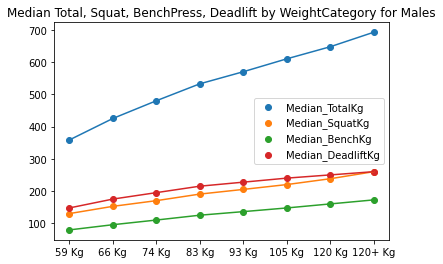

In [34]:
# Visualize total vs weight for males
all_lifts_weightcategorymedian_male = all_lifts_male.groupby(['WeightCategory']).agg(Median_TotalKg=('TotalKg', 'median'))
all_lifts_weightcategorymedian_male = all_lifts_weightcategorymedian_male.reset_index()
all_lifts_weightcategorymedian_male = order_male_weightcategories(all_lifts_weightcategorymedian_male)

display(all_lifts_weightcategorymedian_male)
plt.scatter(all_lifts_weightcategorymedian_male['WeightCategory'], all_lifts_weightcategorymedian_male['Median_TotalKg'], label="Median_TotalKg")
plt.plot(all_lifts_weightcategorymedian_male['WeightCategory'], all_lifts_weightcategorymedian_male['Median_TotalKg'])


# Visualize squat vs weight for males
squat_weightcategorymedian_male = all_lifts_male.groupby(['WeightCategory']).agg(Median_SquatKg=('Best3SquatKg', 'median'))
squat_weightcategorymedian_male = squat_weightcategorymedian_male.reset_index()
squat_weightcategorymedian_male = order_male_weightcategories(squat_weightcategorymedian_male)

display(squat_weightcategorymedian_male)
plt.scatter(squat_weightcategorymedian_male['WeightCategory'], squat_weightcategorymedian_male['Median_SquatKg'], label="Median_SquatKg")
plt.plot(squat_weightcategorymedian_male['WeightCategory'], squat_weightcategorymedian_male['Median_SquatKg'])


# Visualize bench vs weight for males
bench_weightcategorymedian_male = all_lifts_male.groupby(['WeightCategory']).agg(Median_BenchKg=('Best3BenchKg', 'median'))
bench_weightcategorymedian_male = bench_weightcategorymedian_male.reset_index()
bench_weightcategorymedian_male = order_male_weightcategories(bench_weightcategorymedian_male)

display(bench_weightcategorymedian_male)
plt.scatter(bench_weightcategorymedian_male['WeightCategory'], bench_weightcategorymedian_male['Median_BenchKg'], label="Median_BenchKg")
plt.plot(bench_weightcategorymedian_male['WeightCategory'], bench_weightcategorymedian_male['Median_BenchKg'])


# Visualize deadlift vs weight for males
deadlift_weightcategorymedian_male = all_lifts_male.groupby(['WeightCategory']).agg(Median_DeadliftKg=('Best3DeadliftKg', 'median'))
deadlift_weightcategorymedian_male = deadlift_weightcategorymedian_male.reset_index()
deadlift_weightcategorymedian_male = order_male_weightcategories(deadlift_weightcategorymedian_male)

display(deadlift_weightcategorymedian_male)
plt.scatter(deadlift_weightcategorymedian_male['WeightCategory'], deadlift_weightcategorymedian_male['Median_DeadliftKg'], label="Median_DeadliftKg")
plt.plot(deadlift_weightcategorymedian_male['WeightCategory'], deadlift_weightcategorymedian_male['Median_DeadliftKg'])


# Show legend and title
plt.title("Median Total, Squat, BenchPress, Deadlift by WeightCategory for Males")
plt.legend()
plt.show()

In [92]:
all_lifts_male_weightcategory_count = all_lifts_male.groupby(['WeightCategory'])['WeightCategory'].count().reset_index(name='Count')
all_lifts_male_weightcategory_count = order_male_weightcategories(all_lifts_male_weightcategory_count)
display(all_lifts_male_weightcategory_count)

,WeightCategory,Count
3,59 Kg,51071
4,66 Kg,57523
5,74 Kg,108575
6,83 Kg,171261
7,93 Kg,156022
0,105 Kg,142982
1,120 Kg,104994
2,120+ Kg,77579


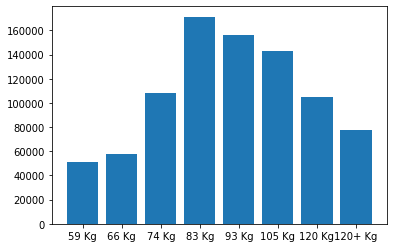

In [93]:
plt.bar(all_lifts_male_weightcategory_count['WeightCategory'], all_lifts_male_weightcategory_count['Count'])
plt.show()

TO DO: Discussion about lifts by total, squat, bench, deadlift for males




,WeightCategory,Median_TotalKg
0,47 Kg,238.14
1,52 Kg,267.50
2,57 Kg,283.50
3,63 Kg,297.50
4,69 Kg,310.71
5,76 Kg,328.85
6,84 Kg,340.00
7,84+ Kg,355.00


,WeightCategory,Median_SquatKg
0,47 Kg,90.00
1,52 Kg,100.00
2,57 Kg,104.33
3,63 Kg,110.00
4,69 Kg,115.00
5,76 Kg,122.47
6,84 Kg,127.50
7,84+ Kg,137.50


,WeightCategory,Median_BenchKg
0,47 Kg,45.36
1,52 Kg,52.50
2,57 Kg,57.50
3,63 Kg,60.00
4,69 Kg,62.50
5,76 Kg,65.00
6,84 Kg,67.50
7,84+ Kg,72.50


,WeightCategory,Median_DeadliftKg
0,47 Kg,102.50
1,52 Kg,115.00
2,57 Kg,122.47
3,63 Kg,127.50
4,69 Kg,133.81
5,76 Kg,140.00
6,84 Kg,142.88
7,84+ Kg,145.15


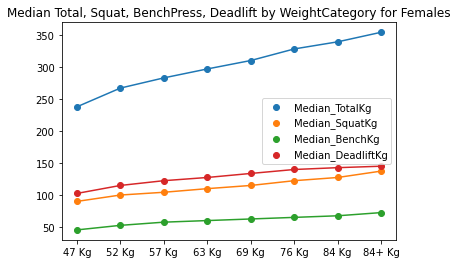

In [36]:
# Visualize total vs weight for females
all_lifts_weightcategorymedian_female = all_lifts_female.groupby(['WeightCategory']).agg(Median_TotalKg=('TotalKg', 'median'))
all_lifts_weightcategorymedian_female = all_lifts_weightcategorymedian_female.reset_index()
all_lifts_weightcategorymedian_female = order_female_weightcategories(all_lifts_weightcategorymedian_female)

display(all_lifts_weightcategorymedian_female)
plt.scatter(all_lifts_weightcategorymedian_female['WeightCategory'], all_lifts_weightcategorymedian_female['Median_TotalKg'], label="Median_TotalKg")
plt.plot(all_lifts_weightcategorymedian_female['WeightCategory'], all_lifts_weightcategorymedian_female['Median_TotalKg'])


# Visualize squat vs weight for females
squat_weightcategorymedian_female = all_lifts_female.groupby(['WeightCategory']).agg(Median_SquatKg=('Best3SquatKg', 'median'))
squat_weightcategorymedian_female = squat_weightcategorymedian_female.reset_index()
squat_weightcategorymedian_female = order_female_weightcategories(squat_weightcategorymedian_female)

display(squat_weightcategorymedian_female)
plt.scatter(squat_weightcategorymedian_female['WeightCategory'], squat_weightcategorymedian_female['Median_SquatKg'], label="Median_SquatKg")
plt.plot(squat_weightcategorymedian_female['WeightCategory'], squat_weightcategorymedian_female['Median_SquatKg'])


# Visualize bench vs weight for females
bench_weightcategorymedian_female = all_lifts_female.groupby(['WeightCategory']).agg(Median_BenchKg=('Best3BenchKg', 'median'))
bench_weightcategorymedian_female = bench_weightcategorymedian_female.reset_index()
bench_weightcategorymedian_female = order_female_weightcategories(bench_weightcategorymedian_female)

display(bench_weightcategorymedian_female)
plt.scatter(bench_weightcategorymedian_female['WeightCategory'], bench_weightcategorymedian_female['Median_BenchKg'], label="Median_BenchKg")
plt.plot(bench_weightcategorymedian_female['WeightCategory'], bench_weightcategorymedian_female['Median_BenchKg'])


# Visualize deadlift vs weight for females
deadlift_weightcategorymedian_female = all_lifts_female.groupby(['WeightCategory']).agg(Median_DeadliftKg=('Best3DeadliftKg', 'median'))
deadlift_weightcategorymedian_female = deadlift_weightcategorymedian_female.reset_index()
deadlift_weightcategorymedian_female = order_female_weightcategories(deadlift_weightcategorymedian_female)

display(deadlift_weightcategorymedian_female)
plt.scatter(deadlift_weightcategorymedian_female['WeightCategory'], deadlift_weightcategorymedian_female['Median_DeadliftKg'], label="Median_DeadliftKg")
plt.plot(deadlift_weightcategorymedian_female['WeightCategory'], deadlift_weightcategorymedian_female['Median_DeadliftKg'])


# Show legend and title
plt.title("Median Total, Squat, BenchPress, Deadlift by WeightCategory for Females")
plt.legend()
plt.show()

In [94]:
all_lifts_female_weightcategory_count = all_lifts_female.groupby(['WeightCategory'])['WeightCategory'].count().reset_index(name='Count')
all_lifts_female_weightcategory_count = order_female_weightcategories(all_lifts_female_weightcategory_count)
display(all_lifts_female_weightcategory_count)

,WeightCategory,Count
0,47 Kg,17300
1,52 Kg,36503
2,57 Kg,44271
3,63 Kg,57903
4,69 Kg,47681
5,76 Kg,49192
6,84 Kg,34303
7,84+ Kg,46997


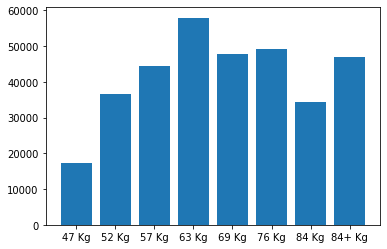

In [95]:
plt.bar(all_lifts_female_weightcategory_count['WeightCategory'], all_lifts_female_weightcategory_count['Count'])
plt.show()

TO DO: Discussion about lifts by total, squat, bench, deadlift for females

The dataset provides four different formulas to assess overall lifter performance: Dots, Wilks, Glossbrenner, and Goodlift.

TO DO: Provide overview of the four and their differences and history.

,WeightCategory,Median_Dots
3,59 Kg,325.940
4,66 Kg,344.420
5,74 Kg,357.320
6,83 Kg,368.900
7,93 Kg,371.315
0,105 Kg,377.000
1,120 Kg,382.120
2,120+ Kg,385.620


,WeightCategory,Median_Wilks
3,59 Kg,332.260
4,66 Kg,346.360
5,74 Kg,356.270
6,83 Kg,365.280
7,93 Kg,366.670
0,105 Kg,372.760
1,120 Kg,380.135
2,120+ Kg,390.510


,WeightCategory,Median_Glossbrenner
3,59 Kg,326.150
4,66 Kg,337.320
5,74 Kg,345.020
6,83 Kg,352.130
7,93 Kg,351.630
0,105 Kg,356.095
1,120 Kg,363.550
2,120+ Kg,372.360


,WeightCategory,Median_Goodlift
3,59 Kg,56.750
4,66 Kg,62.770
5,74 Kg,67.140
6,83 Kg,70.290
7,93 Kg,71.715
0,105 Kg,72.570
1,120 Kg,72.590
2,120+ Kg,71.930


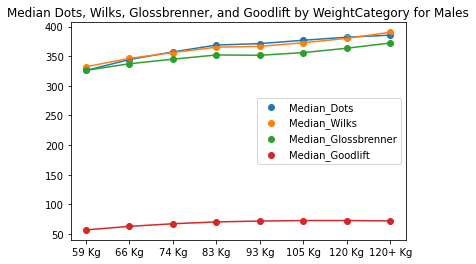

In [38]:
# Visualize Dots vs weight for males
all_lifts_dots_male = all_lifts_male.groupby(['WeightCategory']).agg(Median_Dots=('Dots', 'median'))
all_lifts_dots_male = all_lifts_dots_male.reset_index()
all_lifts_dots_male = order_male_weightcategories(all_lifts_dots_male)

display(all_lifts_dots_male)
plt.scatter(all_lifts_dots_male['WeightCategory'], all_lifts_dots_male['Median_Dots'], label="Median_Dots")
plt.plot(all_lifts_dots_male['WeightCategory'], all_lifts_dots_male['Median_Dots'])


# Visualize Wilks vs weight for males
all_lifts_wilks_male = all_lifts_male.groupby(['WeightCategory']).agg(Median_Wilks=('Wilks', 'median'))
all_lifts_wilks_male = all_lifts_wilks_male.reset_index()
all_lifts_wilks_male = order_male_weightcategories(all_lifts_wilks_male)

display(all_lifts_wilks_male)
plt.scatter(all_lifts_wilks_male['WeightCategory'], all_lifts_wilks_male['Median_Wilks'], label="Median_Wilks")
plt.plot(all_lifts_wilks_male['WeightCategory'], all_lifts_wilks_male['Median_Wilks'])


# Visualize Glossbrenner vs weight for males
all_lifts_glossbrenner_male = all_lifts_male.groupby(['WeightCategory']).agg(Median_Glossbrenner=('Glossbrenner', 'median'))
all_lifts_glossbrenner_male = all_lifts_glossbrenner_male.reset_index()
all_lifts_glossbrenner_male = order_male_weightcategories(all_lifts_glossbrenner_male)

display(all_lifts_glossbrenner_male)
plt.scatter(all_lifts_glossbrenner_male['WeightCategory'], all_lifts_glossbrenner_male['Median_Glossbrenner'], label="Median_Glossbrenner")
plt.plot(all_lifts_glossbrenner_male['WeightCategory'], all_lifts_glossbrenner_male['Median_Glossbrenner'])


# Visualize Goodlift vs weight for males
all_lifts_goodlift_male = all_lifts_male.groupby(['WeightCategory']).agg(Median_Goodlift=('Goodlift', 'median'))
all_lifts_goodlift_male = all_lifts_goodlift_male.reset_index()
all_lifts_goodlift_male = order_male_weightcategories(all_lifts_goodlift_male)

display(all_lifts_goodlift_male)
plt.scatter(all_lifts_goodlift_male['WeightCategory'], all_lifts_goodlift_male['Median_Goodlift'], label="Median_Goodlift")
plt.plot(all_lifts_goodlift_male['WeightCategory'], all_lifts_goodlift_male['Median_Goodlift'])


# Show legend and title
plt.title("Median Dots, Wilks, Glossbrenner, and Goodlift by WeightCategory for Males")
plt.legend()
plt.show()

TO DO: Add description about Dots vs Wilks vs Glossbrenner vs Goodlift for males

,WeightCategory,Median_Dots
0,47 Kg,324.36
1,52 Kg,333.31
2,57 Kg,331.48
3,63 Kg,328.06
4,69 Kg,325.15
5,76 Kg,326.28
6,84 Kg,318.79
7,84+ Kg,305.13


,WeightCategory,Median_Wilks
0,47 Kg,331.880
1,52 Kg,341.560
2,57 Kg,336.860
3,63 Kg,329.660
4,69 Kg,322.270
5,76 Kg,319.615
6,84 Kg,309.610
7,84+ Kg,298.260


,WeightCategory,Median_Glossbrenner
0,47 Kg,297.23
1,52 Kg,303.53
2,57 Kg,297.98
3,63 Kg,291.25
4,69 Kg,284.42
5,76 Kg,281.55
6,84 Kg,271.31
7,84+ Kg,256.76


,WeightCategory,Median_Goodlift
0,47 Kg,59.495
1,52 Kg,62.050
2,57 Kg,63.160
3,63 Kg,63.090
4,69 Kg,62.560
5,76 Kg,63.160
6,84 Kg,61.850
7,84+ Kg,59.660


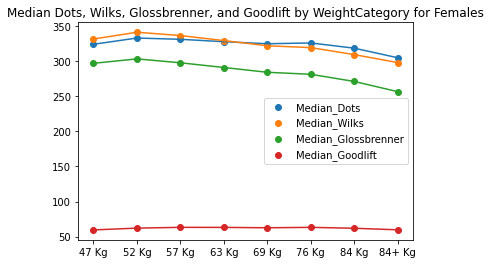

In [39]:
# Visualize Dots vs weight for females
all_lifts_dots_female = all_lifts_female.groupby(['WeightCategory']).agg(Median_Dots=('Dots', 'median'))
all_lifts_dots_female = all_lifts_dots_female.reset_index()
all_lifts_dots_female = order_female_weightcategories(all_lifts_dots_female)

display(all_lifts_dots_female)
plt.scatter(all_lifts_dots_female['WeightCategory'], all_lifts_dots_female['Median_Dots'], label="Median_Dots")
plt.plot(all_lifts_dots_female['WeightCategory'], all_lifts_dots_female['Median_Dots'])


# Visualize Wilks vs weight for females
all_lifts_wilks_female = all_lifts_female.groupby(['WeightCategory']).agg(Median_Wilks=('Wilks', 'median'))
all_lifts_wilks_female = all_lifts_wilks_female.reset_index()
all_lifts_wilks_female = order_female_weightcategories(all_lifts_wilks_female)

display(all_lifts_wilks_female)
plt.scatter(all_lifts_wilks_female['WeightCategory'], all_lifts_wilks_female['Median_Wilks'], label="Median_Wilks")
plt.plot(all_lifts_wilks_female['WeightCategory'], all_lifts_wilks_female['Median_Wilks'])


# Visualize Glossbrenner vs weight for females
all_lifts_glossbrenner_female = all_lifts_female.groupby(['WeightCategory']).agg(Median_Glossbrenner=('Glossbrenner', 'median'))
all_lifts_glossbrenner_female = all_lifts_glossbrenner_female.reset_index()
all_lifts_glossbrenner_female = order_female_weightcategories(all_lifts_glossbrenner_female)

display(all_lifts_glossbrenner_female)
plt.scatter(all_lifts_glossbrenner_female['WeightCategory'], all_lifts_glossbrenner_female['Median_Glossbrenner'], label="Median_Glossbrenner")
plt.plot(all_lifts_glossbrenner_female['WeightCategory'], all_lifts_glossbrenner_female['Median_Glossbrenner'])


# Visualize Goodlift vs weight for females
all_lifts_goodlift_female = all_lifts_female.groupby(['WeightCategory']).agg(Median_Goodlift=('Goodlift', 'median'))
all_lifts_goodlift_female = all_lifts_goodlift_female.reset_index()
all_lifts_goodlift_female = order_female_weightcategories(all_lifts_goodlift_female)

display(all_lifts_goodlift_female)
plt.scatter(all_lifts_goodlift_female['WeightCategory'], all_lifts_goodlift_female['Median_Goodlift'], label="Median_Goodlift")
plt.plot(all_lifts_goodlift_female['WeightCategory'], all_lifts_goodlift_female['Median_Goodlift'])


# Show legend and title
plt.title("Median Dots, Wilks, Glossbrenner, and Goodlift by WeightCategory for Females")
plt.legend()
plt.show()

TO DO : Talk about scores for females.

Why is decreasing?

### Lifts by AgeCategory

We will now assess lifts by AgeCategory.

In [40]:
# Max total lift by AgeCategory for males
all_lifts_agecategory_male = all_lifts_male.loc[all_lifts_male.groupby(['AgeCategory'])['TotalKg'].idxmax()]
all_lifts_agecategory_male = all_lifts_agecategory_male.reset_index()
all_lifts_agecategory_male = all_lifts_agecategory_male[['Name', 'Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'AgeCategory', 'WeightCategory', 'TotalKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Country', 'Date']]

def order_agecategories(df):
  age_categories = {'Sub-Junior':0, 'Junior':1, 'Open':2, 'Master 1':3, 'Master 2':4, 'Master 3':5, 'Master 4':6}
  return df.sort_values(by=['AgeCategory'], key=lambda x: x.map(age_categories))

all_lifts_agecategory_male = order_agecategories(all_lifts_agecategory_male)
display(all_lifts_agecategory_male)

,Name,Sex,Event,Equipment,Age,BodyweightKg,AgeCategory,WeightCategory,TotalKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Country,Date
6,Ray Bowring,M,SBD,Single-ply,18.5,153.20,Sub-Junior,120+ Kg,1030.00,435.00,260.00,335.00,England,2021-06-26
0,Dave Hoff #1,M,SBD,Multi-ply,23.5,126.55,Junior,120+ Kg,1342.63,544.31,437.72,360.61,USA,2011-12-04
5,Dave Hoff #1,M,SBD,Multi-ply,31.0,132.60,Open,120+ Kg,1407.50,577.50,460.00,370.00,USA,2019-10-28
1,Donnie Thompson #1,M,SBD,Multi-ply,46.5,174.69,Master 1,120+ Kg,1360.78,573.79,430.91,356.07,USA,2011-08-20
2,Steve Brock,M,SBD,Multi-ply,50.0,144.10,Master 2,120+ Kg,1052.50,500.00,277.50,275.00,USA,2020-12-20
3,Mike Dempsey,M,SBD,Multi-ply,61.0,145.33,Master 3,120+ Kg,936.67,385.55,256.28,294.84,NaN,2021-11-13
4,Gary Brooks,M,SBD,Single-ply,70.0,108.23,Master 4,120 Kg,823.27,369.68,192.78,260.82,USA,2021-03-14


TO DO: Discuss for males

In [41]:
# Max total lift by AgeCategory for females
all_lifts_agecategory_female = all_lifts_female.loc[all_lifts_female.groupby(['AgeCategory'])['TotalKg'].idxmax()]
all_lifts_agecategory_female = all_lifts_agecategory_female.reset_index()
all_lifts_agecategory_female = all_lifts_agecategory_female[['Name', 'Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'AgeCategory', 'WeightCategory', 'TotalKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Country', 'Date']]

def order_agecategories(df):
  age_categories = {'Sub-Junior':0, 'Junior':1, 'Open':2, 'Master 1':3, 'Master 2':4, 'Master 3':5, 'Master 4':6}
  return df.sort_values(by=['AgeCategory'], key=lambda x: x.map(age_categories))

all_lifts_agecategory_female = order_agecategories(all_lifts_agecategory_female)
display(all_lifts_agecategory_female)

,Name,Sex,Event,Equipment,Age,BodyweightKg,AgeCategory,WeightCategory,TotalKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Country,Date
6,Lexi Harris,F,SBD,Single-ply,17.5,169.24,Sub-Junior,84+ Kg,689.46,272.16,197.31,219.99,USA,2017-03-17
0,Agata Sitko,F,SBD,Single-ply,19.5,76.00,Junior,76 Kg,726.00,270.00,195.00,261.00,Poland,2022-07-08
5,Becca Swanson,F,SBD,Multi-ply,31.0,112.10,Open,84+ Kg,930.00,387.50,237.50,305.00,USA,2005-10-29
1,Rebecca Roberts #1,F,SBD,Multi-ply,44.0,82.10,Master 1,84 Kg,780.18,299.37,219.99,260.82,USA,2022-04-09
2,Dorothy Shaw,F,SBD,Multi-ply,52.0,110.80,Master 2,84+ Kg,665.00,305.00,140.00,220.00,UK,2015-11-14
3,Mullin,F,SBD,Single-ply,62.0,90.00,Master 3,84+ Kg,597.50,227.50,132.50,237.50,NaN,1992-05-16
4,Barbara Haiden,F,SBD,Wraps,71.0,80.50,Master 4,84 Kg,480.00,175.00,130.00,175.00,USA,2021-12-04


TO DO: Discuss for females

,AgeCategory,Median_TotalKg
6,Sub-Junior,462.5
0,Junior,570.0
5,Open,620.0
1,Master 1,597.5
2,Master 2,535.0
3,Master 3,452.5
4,Master 4,365.0


,AgeCategory,Median_SquatKg
6,Sub-Junior,170.1
0,Junior,205.0
5,Open,222.5
1,Master 1,215.0
2,Master 2,190.0
3,Master 3,157.5
4,Master 4,120.0


,AgeCategory,Median_BenchKg
6,Sub-Junior,105.0
0,Junior,135.0
5,Open,150.0
1,Master 1,147.5
2,Master 2,130.0
3,Master 3,107.5
4,Master 4,85.0


,AgeCategory,Median_DeadliftKg
6,Sub-Junior,183.70
0,Junior,227.50
5,Open,245.00
1,Master 1,232.50
2,Master 2,212.50
3,Master 3,187.50
4,Master 4,158.76


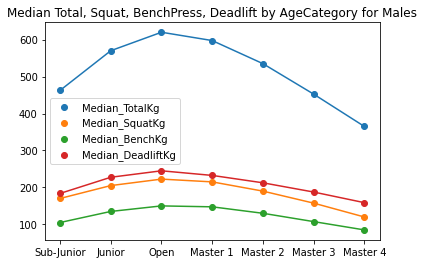

In [42]:
# Visualize total vs age for males
all_lifts_agecategorymedian_male = all_lifts_male.groupby(['AgeCategory']).agg(Median_TotalKg=('TotalKg', 'median'))
all_lifts_agecategorymedian_male = all_lifts_agecategorymedian_male.reset_index()
all_lifts_agecategorymedian_male = order_agecategories(all_lifts_agecategorymedian_male)

display(all_lifts_agecategorymedian_male)
plt.scatter(all_lifts_agecategorymedian_male['AgeCategory'], all_lifts_agecategorymedian_male['Median_TotalKg'], label="Median_TotalKg")
plt.plot(all_lifts_agecategorymedian_male['AgeCategory'], all_lifts_agecategorymedian_male['Median_TotalKg'])


# Visualize squat vs age for males
squat_agecategorymedian_male = all_lifts_male.groupby(['AgeCategory']).agg(Median_SquatKg=('Best3SquatKg', 'median'))
squat_agecategorymedian_male = squat_agecategorymedian_male.reset_index()
squat_agecategorymedian_male = order_agecategories(squat_agecategorymedian_male)

display(squat_agecategorymedian_male)
plt.scatter(squat_agecategorymedian_male['AgeCategory'], squat_agecategorymedian_male['Median_SquatKg'], label="Median_SquatKg")
plt.plot(squat_agecategorymedian_male['AgeCategory'], squat_agecategorymedian_male['Median_SquatKg'])


# Visualize bench vs age for males
bench_agecategorymedian_male = all_lifts_male.groupby(['AgeCategory']).agg(Median_BenchKg=('Best3BenchKg', 'median'))
bench_agecategorymedian_male = bench_agecategorymedian_male.reset_index()
bench_agecategorymedian_male = order_agecategories(bench_agecategorymedian_male)

display(bench_agecategorymedian_male)
plt.scatter(bench_agecategorymedian_male['AgeCategory'], bench_agecategorymedian_male['Median_BenchKg'], label="Median_BenchKg")
plt.plot(bench_agecategorymedian_male['AgeCategory'], bench_agecategorymedian_male['Median_BenchKg'])


# Visualize deadlift vs age for males
deadlift_agecategorymedian_male = all_lifts_male.groupby(['AgeCategory']).agg(Median_DeadliftKg=('Best3DeadliftKg', 'median'))
deadlift_agecategorymedian_male = deadlift_agecategorymedian_male.reset_index()
deadlift_agecategorymedian_male = order_agecategories(deadlift_agecategorymedian_male)

display(deadlift_agecategorymedian_male)
plt.scatter(deadlift_agecategorymedian_male['AgeCategory'], deadlift_agecategorymedian_male['Median_DeadliftKg'], label="Median_DeadliftKg")
plt.plot(deadlift_agecategorymedian_male['AgeCategory'], deadlift_agecategorymedian_male['Median_DeadliftKg'])


# Show legend and title
plt.title("Median Total, Squat, BenchPress, Deadlift by AgeCategory for Males")
plt.legend()
plt.show()

In [96]:
all_lifts_male_agecategory_count = all_lifts_male.groupby(['AgeCategory'])['AgeCategory'].count().reset_index(name='Count')
all_lifts_male_agecategory_count = order_agecategories(all_lifts_male_agecategory_count)
display(all_lifts_male_agecategory_count)

,AgeCategory,Count
6,Sub-Junior,241237
0,Junior,198721
5,Open,282220
1,Master 1,83886
2,Master 2,41208
3,Master 3,17280
4,Master 4,5455


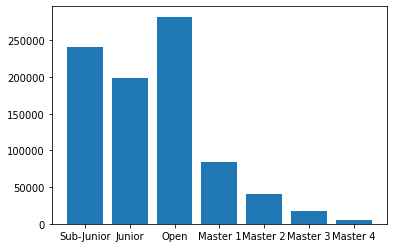

In [97]:
plt.bar(all_lifts_male_agecategory_count['AgeCategory'], all_lifts_male_agecategory_count['Count'])
plt.show()

TO DO: Describe male

,AgeCategory,Median_TotalKg
6,Sub-Junior,283.5
0,Junior,314.0
5,Open,327.5
1,Master 1,315.0
2,Master 2,285.0
3,Master 3,245.0
4,Master 4,200.0


,AgeCategory,Median_SquatKg
6,Sub-Junior,110.0
0,Junior,115.0
5,Open,120.0
1,Master 1,112.5
2,Master 2,100.0
3,Master 3,82.5
4,Master 4,62.5


,AgeCategory,Median_BenchKg
6,Sub-Junior,55.0
0,Junior,62.5
5,Open,65.0
1,Master 1,65.0
2,Master 2,60.0
3,Master 3,50.0
4,Master 4,42.5


,AgeCategory,Median_DeadliftKg
6,Sub-Junior,117.93
0,Junior,135.00
5,Open,140.00
1,Master 1,137.50
2,Master 2,125.00
3,Master 3,112.50
4,Master 4,97.50


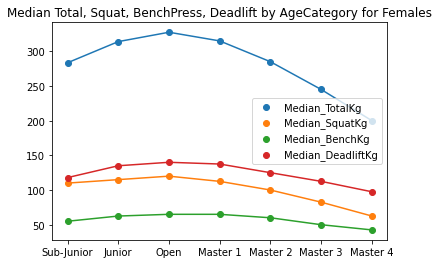

In [43]:
# Visualize total vs age for females
all_lifts_agecategorymedian_female = all_lifts_female.groupby(['AgeCategory']).agg(Median_TotalKg=('TotalKg', 'median'))
all_lifts_agecategorymedian_female = all_lifts_agecategorymedian_female.reset_index()
all_lifts_agecategorymedian_female = order_agecategories(all_lifts_agecategorymedian_female)

display(all_lifts_agecategorymedian_female)
plt.scatter(all_lifts_agecategorymedian_female['AgeCategory'], all_lifts_agecategorymedian_female['Median_TotalKg'], label="Median_TotalKg")
plt.plot(all_lifts_agecategorymedian_female['AgeCategory'], all_lifts_agecategorymedian_female['Median_TotalKg'])


# Visualize squat vs age for females
squat_agecategorymedian_female = all_lifts_female.groupby(['AgeCategory']).agg(Median_SquatKg=('Best3SquatKg', 'median'))
squat_agecategorymedian_female = squat_agecategorymedian_female.reset_index()
squat_agecategorymedian_female = order_agecategories(squat_agecategorymedian_female)

display(squat_agecategorymedian_female)
plt.scatter(squat_agecategorymedian_female['AgeCategory'], squat_agecategorymedian_female['Median_SquatKg'], label="Median_SquatKg")
plt.plot(squat_agecategorymedian_female['AgeCategory'], squat_agecategorymedian_female['Median_SquatKg'])


# Visualize bench vs age for females
bench_agecategorymedian_female = all_lifts_female.groupby(['AgeCategory']).agg(Median_BenchKg=('Best3BenchKg', 'median'))
bench_agecategorymedian_female = bench_agecategorymedian_female.reset_index()
bench_agecategorymedian_female = order_agecategories(bench_agecategorymedian_female)

display(bench_agecategorymedian_female)
plt.scatter(bench_agecategorymedian_female['AgeCategory'], bench_agecategorymedian_female['Median_BenchKg'], label="Median_BenchKg")
plt.plot(bench_agecategorymedian_female['AgeCategory'], bench_agecategorymedian_female['Median_BenchKg'])


# Visualize deadlift vs age for females
deadlift_agecategorymedian_female = all_lifts_female.groupby(['AgeCategory']).agg(Median_DeadliftKg=('Best3DeadliftKg', 'median'))
deadlift_agecategorymedian_female = deadlift_agecategorymedian_female.reset_index()
deadlift_agecategorymedian_female = order_agecategories(deadlift_agecategorymedian_female)

display(deadlift_agecategorymedian_female)
plt.scatter(deadlift_agecategorymedian_female['AgeCategory'], deadlift_agecategorymedian_female['Median_DeadliftKg'], label="Median_DeadliftKg")
plt.plot(deadlift_agecategorymedian_female['AgeCategory'], deadlift_agecategorymedian_female['Median_DeadliftKg'])


# Show legend and title
plt.title("Median Total, Squat, BenchPress, Deadlift by AgeCategory for Females")
plt.legend()
plt.show()

In [98]:
all_lifts_female_agecategory_count = all_lifts_female.groupby(['AgeCategory'])['AgeCategory'].count().reset_index(name='Count')
all_lifts_female_agecategory_count = order_agecategories(all_lifts_female_agecategory_count)
display(all_lifts_female_agecategory_count)

,AgeCategory,Count
6,Sub-Junior,99715
0,Junior,64252
5,Open,112287
1,Master 1,37038
2,Master 2,15266
3,Master 3,4733
4,Master 4,859


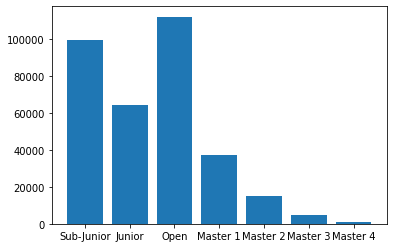

In [99]:
plt.bar(all_lifts_female_agecategory_count['AgeCategory'], all_lifts_female_agecategory_count['Count'])
plt.show()

TODO: Description

,AgeCategory,Median_Dots
6,Sub-Junior,325.410
0,Junior,383.030
5,Open,400.050
1,Master 1,381.090
2,Master 2,347.995
3,Master 3,302.810
4,Master 4,253.000


,AgeCategory,Median_Wilks
6,Sub-Junior,324.920
0,Junior,380.530
5,Open,397.545
1,Master 1,378.910
2,Master 2,346.040
3,Master 3,300.890
4,Master 4,251.350


,AgeCategory,Median_Glossbrenner
6,Sub-Junior,313.67
0,Junior,366.13
5,Open,381.56
1,Master 1,363.53
2,Master 2,332.16
3,Master 3,289.15
4,Master 4,241.96


,AgeCategory,Median_Goodlift
6,Sub-Junior,58.08
0,Junior,73.90
5,Open,77.35
1,Master 1,71.69
2,Master 2,65.36
3,Master 3,56.99
4,Master 4,48.28


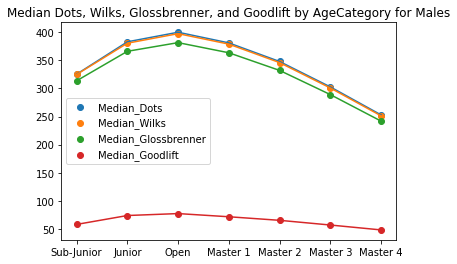

In [44]:
# Visualize Dots vs age for males
all_lifts_dots_male = all_lifts_male.groupby(['AgeCategory']).agg(Median_Dots=('Dots', 'median'))
all_lifts_dots_male = all_lifts_dots_male.reset_index()
all_lifts_dots_male = order_agecategories(all_lifts_dots_male)

display(all_lifts_dots_male)
plt.scatter(all_lifts_dots_male['AgeCategory'], all_lifts_dots_male['Median_Dots'], label="Median_Dots")
plt.plot(all_lifts_dots_male['AgeCategory'], all_lifts_dots_male['Median_Dots'])


# Visualize Wilks vs age for males
all_lifts_wilks_male = all_lifts_male.groupby(['AgeCategory']).agg(Median_Wilks=('Wilks', 'median'))
all_lifts_wilks_male = all_lifts_wilks_male.reset_index()
all_lifts_wilks_male = order_agecategories(all_lifts_wilks_male)

display(all_lifts_wilks_male)
plt.scatter(all_lifts_wilks_male['AgeCategory'], all_lifts_wilks_male['Median_Wilks'], label="Median_Wilks")
plt.plot(all_lifts_wilks_male['AgeCategory'], all_lifts_wilks_male['Median_Wilks'])


# Visualize Glossbrenner vs age for males
all_lifts_glossbrenner_male = all_lifts_male.groupby(['AgeCategory']).agg(Median_Glossbrenner=('Glossbrenner', 'median'))
all_lifts_glossbrenner_male = all_lifts_glossbrenner_male.reset_index()
all_lifts_glossbrenner_male = order_agecategories(all_lifts_glossbrenner_male)

display(all_lifts_glossbrenner_male)
plt.scatter(all_lifts_glossbrenner_male['AgeCategory'], all_lifts_glossbrenner_male['Median_Glossbrenner'], label="Median_Glossbrenner")
plt.plot(all_lifts_glossbrenner_male['AgeCategory'], all_lifts_glossbrenner_male['Median_Glossbrenner'])


# Visualize Goodlift vs age for males
all_lifts_goodlift_male = all_lifts_male.groupby(['AgeCategory']).agg(Median_Goodlift=('Goodlift', 'median'))
all_lifts_goodlift_male = all_lifts_goodlift_male.reset_index()
all_lifts_goodlift_male = order_agecategories(all_lifts_goodlift_male)

display(all_lifts_goodlift_male)
plt.scatter(all_lifts_goodlift_male['AgeCategory'], all_lifts_goodlift_male['Median_Goodlift'], label="Median_Goodlift")
plt.plot(all_lifts_goodlift_male['AgeCategory'], all_lifts_goodlift_male['Median_Goodlift'])


# Show legend and title
plt.title("Median Dots, Wilks, Glossbrenner, and Goodlift by AgeCategory for Males")
plt.legend()
plt.show()

TO DO: DIscuss

,AgeCategory,Median_Dots
6,Sub-Junior,304.530
0,Junior,338.390
5,Open,340.650
1,Master 1,322.455
2,Master 2,297.440
3,Master 3,258.100
4,Master 4,218.420


,AgeCategory,Median_Wilks
6,Sub-Junior,303.90
0,Junior,338.04
5,Open,338.75
1,Master 1,320.01
2,Master 2,296.06
3,Master 3,255.60
4,Master 4,218.65


,AgeCategory,Median_Glossbrenner
6,Sub-Junior,267.66
0,Junior,298.01
5,Open,297.98
1,Master 1,281.20
2,Master 2,260.55
3,Master 3,224.69
4,Master 4,192.42


,AgeCategory,Median_Goodlift
6,Sub-Junior,54.06
0,Junior,66.19
5,Open,67.93
1,Master 1,63.82
2,Master 2,58.75
3,Master 3,51.31
4,Master 4,43.27


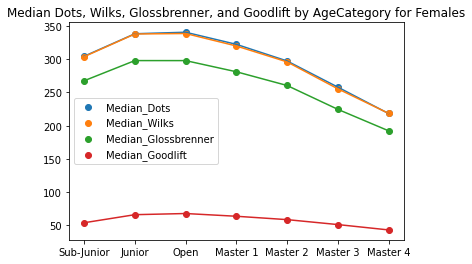

In [45]:
# Visualize Dots vs age for females
all_lifts_dots_female = all_lifts_female.groupby(['AgeCategory']).agg(Median_Dots=('Dots', 'median'))
all_lifts_dots_female = all_lifts_dots_female.reset_index()
all_lifts_dots_female = order_agecategories(all_lifts_dots_female)

display(all_lifts_dots_female)
plt.scatter(all_lifts_dots_female['AgeCategory'], all_lifts_dots_female['Median_Dots'], label="Median_Dots")
plt.plot(all_lifts_dots_female['AgeCategory'], all_lifts_dots_female['Median_Dots'])


# Visualize Wilks vs age for females
all_lifts_wilks_female = all_lifts_female.groupby(['AgeCategory']).agg(Median_Wilks=('Wilks', 'median'))
all_lifts_wilks_female = all_lifts_wilks_female.reset_index()
all_lifts_wilks_female = order_agecategories(all_lifts_wilks_female)

display(all_lifts_wilks_female)
plt.scatter(all_lifts_wilks_female['AgeCategory'], all_lifts_wilks_female['Median_Wilks'], label="Median_Wilks")
plt.plot(all_lifts_wilks_female['AgeCategory'], all_lifts_wilks_female['Median_Wilks'])


# Visualize Glossbrenner vs age for females
all_lifts_glossbrenner_female = all_lifts_female.groupby(['AgeCategory']).agg(Median_Glossbrenner=('Glossbrenner', 'median'))
all_lifts_glossbrenner_female = all_lifts_glossbrenner_female.reset_index()
all_lifts_glossbrenner_female = order_agecategories(all_lifts_glossbrenner_female)

display(all_lifts_glossbrenner_female)
plt.scatter(all_lifts_glossbrenner_female['AgeCategory'], all_lifts_glossbrenner_female['Median_Glossbrenner'], label="Median_Glossbrenner")
plt.plot(all_lifts_glossbrenner_female['AgeCategory'], all_lifts_glossbrenner_female['Median_Glossbrenner'])


# Visualize Goodlift vs age for females
all_lifts_goodlift_female = all_lifts_female.groupby(['AgeCategory']).agg(Median_Goodlift=('Goodlift', 'median'))
all_lifts_goodlift_female = all_lifts_goodlift_female.reset_index()
all_lifts_goodlift_female = order_agecategories(all_lifts_goodlift_female)

display(all_lifts_goodlift_female)
plt.scatter(all_lifts_goodlift_female['AgeCategory'], all_lifts_goodlift_female['Median_Goodlift'], label="Median_Goodlift")
plt.plot(all_lifts_goodlift_female['AgeCategory'], all_lifts_goodlift_female['Median_Goodlift'])


# Show legend and title
plt.title("Median Dots, Wilks, Glossbrenner, and Goodlift by AgeCategory for Females")
plt.legend()
plt.show()

### Lifts by Tested/NotTested

TODO: Desription of how tested vs not tested history. How PEDs improve performance.

In [102]:
all_lifts_male_tested_count = all_lifts_male.groupby(['Tested'])['Tested'].count().reset_index(name='Count')
display(all_lifts_male_tested_count)

all_lifts_female_tested_count = all_lifts_female.groupby(['Tested'])['Tested'].count().reset_index(name='Count')
display(all_lifts_female_tested_count)

,Tested,Count
0,False,213008
1,True,656999


,Tested,Count
0,False,66225
1,True,267925


We see that 76% of male lifters and 80% of female lifters competed in drug tested competitions. We will now check to see if there is a significant difference in performance between lifters in drug tested competitions and lifters in not drug tested competitions.

In [108]:
all_lifts_male_tested_weightcategory_count = all_lifts_male.groupby(['Tested', 'WeightCategory'])['WeightCategory'].count().reset_index(name='Count')
all_lifts_male_tested_weightcategory_count = order_male_weightcategories(all_lifts_male_tested_weightcategory_count)
all_lifts_male_tested_weightcategory_count = all_lifts_male_tested_weightcategory_count.sort_values(by='Tested')
all_lifts_male_tested_weightcategory_count = all_lifts_male_tested_weightcategory_count.reset_index(drop=True)
display(all_lifts_male_tested_weightcategory_count)

,Tested,WeightCategory,Count
0,False,59 Kg,4735
1,False,66 Kg,6732
2,False,74 Kg,18067
3,False,83 Kg,39952
4,False,93 Kg,38539
5,False,105 Kg,43017
6,False,120 Kg,34537
7,False,120+ Kg,27429
8,True,59 Kg,46336
9,True,66 Kg,50791


In [109]:
all_lifts_female_tested_weightcategory_count = all_lifts_female.groupby(['Tested', 'WeightCategory'])['WeightCategory'].count().reset_index(name='Count')
all_lifts_female_tested_weightcategory_count = order_female_weightcategories(all_lifts_female_tested_weightcategory_count)
all_lifts_female_tested_weightcategory_count = all_lifts_female_tested_weightcategory_count.sort_values(by='Tested')
all_lifts_female_tested_weightcategory_count = all_lifts_female_tested_weightcategory_count.reset_index(drop=True)
display(all_lifts_female_tested_weightcategory_count)

,Tested,WeightCategory,Count
0,False,47 Kg,1221
1,False,52 Kg,5175
2,False,57 Kg,7058
3,False,63 Kg,10531
4,False,69 Kg,13078
5,False,76 Kg,11445
6,False,84 Kg,7305
7,False,84+ Kg,10412
8,True,47 Kg,16079
9,True,52 Kg,31328


,WeightCategory,Median_TotalKg
3,59 Kg,358.34
4,66 Kg,425.00
5,74 Kg,480.00
6,83 Kg,530.00
7,93 Kg,565.00
0,105 Kg,600.00
1,120 Kg,627.50
2,120+ Kg,662.25


,WeightCategory,Median_TotalKg
3,59 Kg,355.00
4,66 Kg,420.00
5,74 Kg,478.54
6,83 Kg,545.00
7,93 Kg,590.00
0,105 Kg,637.50
1,120 Kg,687.50
2,120+ Kg,748.43


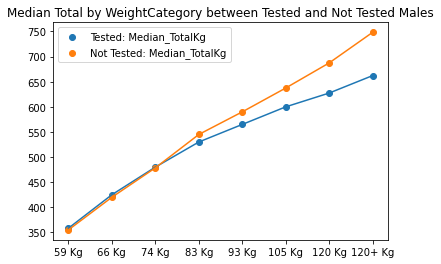

In [48]:
# Visualize total lifts of tested vs not tested males

# Tested males 
tested_all_lifts_male_weightcategorymedian = tested_all_lifts_male.groupby(['WeightCategory']).agg(Median_TotalKg=('TotalKg', 'median'))
tested_all_lifts_male_weightcategorymedian = tested_all_lifts_male_weightcategorymedian.reset_index()
tested_all_lifts_male_weightcategorymedian = order_male_weightcategories(tested_all_lifts_male_weightcategorymedian)

display(tested_all_lifts_male_weightcategorymedian)
plt.scatter(tested_all_lifts_male_weightcategorymedian['WeightCategory'], tested_all_lifts_male_weightcategorymedian['Median_TotalKg'], label="Tested: Median_TotalKg")
plt.plot(tested_all_lifts_male_weightcategorymedian['WeightCategory'], tested_all_lifts_male_weightcategorymedian['Median_TotalKg'])

# Not tested males
not_tested_all_lifts_male_weightcategorymedian = not_tested_all_lifts_male.groupby(['WeightCategory']).agg(Median_TotalKg=('TotalKg', 'median'))
not_tested_all_lifts_male_weightcategorymedian = not_tested_all_lifts_male_weightcategorymedian.reset_index()
not_tested_all_lifts_male_weightcategorymedian = order_male_weightcategories(not_tested_all_lifts_male_weightcategorymedian)

display(not_tested_all_lifts_male_weightcategorymedian)
plt.scatter(not_tested_all_lifts_male_weightcategorymedian['WeightCategory'], not_tested_all_lifts_male_weightcategorymedian['Median_TotalKg'], label="Not Tested: Median_TotalKg")
plt.plot(not_tested_all_lifts_male_weightcategorymedian['WeightCategory'], not_tested_all_lifts_male_weightcategorymedian['Median_TotalKg'])


# Show legend and title
plt.title("Median Total by WeightCategory between Tested and Not Tested Males")
plt.legend()
plt.show()

In [49]:
# Find percentage difference in median total lift between tested and not tested males
all_lifts_testing_combined_male = pd.merge(tested_all_lifts_male_weightcategorymedian, not_tested_all_lifts_male_weightcategorymedian, on="WeightCategory")
all_lifts_testing_combined_male = all_lifts_testing_combined_male.rename(columns={'Median_TotalKg_x':'Tested_Median_TotalKg', 'Median_TotalKg_y':'NotTested_Median_TotalKg'})
all_lifts_testing_combined_male['Pct_Difference'] = round(((all_lifts_testing_combined_male['NotTested_Median_TotalKg'] / all_lifts_testing_combined_male['Tested_Median_TotalKg']) - 1) * 100, 2)
display(all_lifts_testing_combined_male)

,WeightCategory,Tested_Median_TotalKg,NotTested_Median_TotalKg,Pct_Difference
0,59 Kg,358.34,355.00,-0.93
1,66 Kg,425.00,420.00,-1.18
2,74 Kg,480.00,478.54,-0.30
3,83 Kg,530.00,545.00,2.83
4,93 Kg,565.00,590.00,4.42
5,105 Kg,600.00,637.50,6.25
6,120 Kg,627.50,687.50,9.56
7,120+ Kg,662.25,748.43,13.01


There is a fairly substantial difference in performance between tested and not tested male lifters. We shall see which lift has the most difference.

,WeightCategory,Median_TotalKg
0,47 Kg,238.14
1,52 Kg,267.62
2,57 Kg,283.50
3,63 Kg,297.10
4,69 Kg,308.44
5,76 Kg,325.00
6,84 Kg,337.50
7,84+ Kg,352.50


,WeightCategory,Median_TotalKg
0,47 Kg,235.00
1,52 Kg,262.50
2,57 Kg,282.50
3,63 Kg,297.50
4,69 Kg,319.78
5,76 Kg,340.00
6,84 Kg,347.50
7,84+ Kg,362.50


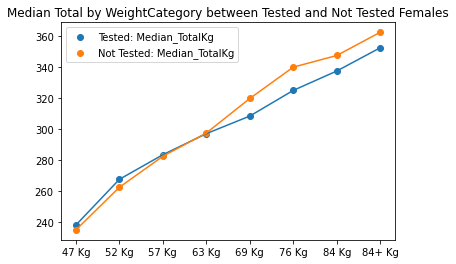

In [50]:
# Visualize total lifts of tested vs not tested females

# Tested females 
tested_all_lifts_female_weightcategorymedian = tested_all_lifts_female.groupby(['WeightCategory']).agg(Median_TotalKg=('TotalKg', 'median'))
tested_all_lifts_female_weightcategorymedian = tested_all_lifts_female_weightcategorymedian.reset_index()
tested_all_lifts_female_weightcategorymedian = order_female_weightcategories(tested_all_lifts_female_weightcategorymedian)

display(tested_all_lifts_female_weightcategorymedian)
plt.scatter(tested_all_lifts_female_weightcategorymedian['WeightCategory'], tested_all_lifts_female_weightcategorymedian['Median_TotalKg'], label="Tested: Median_TotalKg")
plt.plot(tested_all_lifts_female_weightcategorymedian['WeightCategory'], tested_all_lifts_female_weightcategorymedian['Median_TotalKg'])

# Not tested females
not_tested_all_lifts_female_weightcategorymedian = not_tested_all_lifts_female.groupby(['WeightCategory']).agg(Median_TotalKg=('TotalKg', 'median'))
not_tested_all_lifts_female_weightcategorymedian = not_tested_all_lifts_female_weightcategorymedian.reset_index()
not_tested_all_lifts_female_weightcategorymedian = order_female_weightcategories(not_tested_all_lifts_female_weightcategorymedian)

display(not_tested_all_lifts_female_weightcategorymedian)
plt.scatter(not_tested_all_lifts_female_weightcategorymedian['WeightCategory'], not_tested_all_lifts_female_weightcategorymedian['Median_TotalKg'], label="Not Tested: Median_TotalKg")
plt.plot(not_tested_all_lifts_female_weightcategorymedian['WeightCategory'], not_tested_all_lifts_female_weightcategorymedian['Median_TotalKg'])


# Show legend and title
plt.title("Median Total by WeightCategory between Tested and Not Tested Females")
plt.legend()
plt.show()

In [51]:
# Find percentage difference in median total lift between tested and not tested females
all_lifts_testing_combined_female = pd.merge(tested_all_lifts_female_weightcategorymedian, not_tested_all_lifts_female_weightcategorymedian, on="WeightCategory")
all_lifts_testing_combined_female = all_lifts_testing_combined_female.rename(columns={'Median_TotalKg_x':'Tested_Median_TotalKg', 'Median_TotalKg_y':'NotTested_Median_TotalKg'})
all_lifts_testing_combined_female['Pct_Difference'] = round(((all_lifts_testing_combined_female['NotTested_Median_TotalKg'] / all_lifts_testing_combined_female['Tested_Median_TotalKg']) - 1) * 100, 2)
display(all_lifts_testing_combined_female)

,WeightCategory,Tested_Median_TotalKg,NotTested_Median_TotalKg,Pct_Difference
0,47 Kg,238.14,235.00,-1.32
1,52 Kg,267.62,262.50,-1.91
2,57 Kg,283.50,282.50,-0.35
3,63 Kg,297.10,297.50,0.13
4,69 Kg,308.44,319.78,3.68
5,76 Kg,325.00,340.00,4.62
6,84 Kg,337.50,347.50,2.96
7,84+ Kg,352.50,362.50,2.84


Less difference in total lift between tested and non tested female lifters.

We will now check the difference for each of the three individual lifts for both males and females.

,WeightCategory,Median_SquatKg
3,59 Kg,130.00
4,66 Kg,152.50
5,74 Kg,172.37
6,83 Kg,190.00
7,93 Kg,204.12
0,105 Kg,217.72
1,120 Kg,231.33
2,120+ Kg,250.00


,WeightCategory,Median_SquatKg
3,59 Kg,124.74
4,66 Kg,147.50
5,74 Kg,170.00
6,83 Kg,195.00
7,93 Kg,210.92
0,105 Kg,230.00
1,120 Kg,250.00
2,120+ Kg,280.00


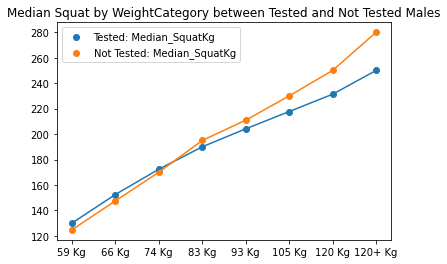

In [52]:
# Visualize squat lifts of tested vs not tested males

# Tested males 
tested_squat_male_weightcategorymedian = tested_all_lifts_male.groupby(['WeightCategory']).agg(Median_SquatKg=('Best3SquatKg', 'median'))
tested_squat_male_weightcategorymedian = tested_squat_male_weightcategorymedian.reset_index()
tested_squat_male_weightcategorymedian = order_male_weightcategories(tested_squat_male_weightcategorymedian)

display(tested_squat_male_weightcategorymedian)
plt.scatter(tested_squat_male_weightcategorymedian['WeightCategory'], tested_squat_male_weightcategorymedian['Median_SquatKg'], label="Tested: Median_SquatKg")
plt.plot(tested_squat_male_weightcategorymedian['WeightCategory'], tested_squat_male_weightcategorymedian['Median_SquatKg'])

# Not tested males
not_tested_squat_male_weightcategorymedian = not_tested_all_lifts_male.groupby(['WeightCategory']).agg(Median_SquatKg=('Best3SquatKg', 'median'))
not_tested_squat_male_weightcategorymedian = not_tested_squat_male_weightcategorymedian.reset_index()
not_tested_squat_male_weightcategorymedian = order_male_weightcategories(not_tested_squat_male_weightcategorymedian)

display(not_tested_squat_male_weightcategorymedian)
plt.scatter(not_tested_squat_male_weightcategorymedian['WeightCategory'], not_tested_squat_male_weightcategorymedian['Median_SquatKg'], label="Not Tested: Median_SquatKg")
plt.plot(not_tested_squat_male_weightcategorymedian['WeightCategory'], not_tested_squat_male_weightcategorymedian['Median_SquatKg'])


# Show legend and title
plt.title("Median Squat by WeightCategory between Tested and Not Tested Males")
plt.legend()
plt.show()

In [53]:
# Find percentage difference in median squat lift between tested and not tested males
squat_testing_combined_male = pd.merge(tested_squat_male_weightcategorymedian, not_tested_squat_male_weightcategorymedian, on="WeightCategory")
squat_testing_combined_male = squat_testing_combined_male.rename(columns={'Median_SquatKg_x':'Tested_Median_SquatKg', 'Median_SquatKg_y':'NotTested_Median_SquatKg'})
squat_testing_combined_male['Pct_Difference'] = round(((squat_testing_combined_male['NotTested_Median_SquatKg'] / squat_testing_combined_male['Tested_Median_SquatKg']) - 1) * 100, 2)
display(squat_testing_combined_male)

,WeightCategory,Tested_Median_SquatKg,NotTested_Median_SquatKg,Pct_Difference
0,59 Kg,130.00,124.74,-4.05
1,66 Kg,152.50,147.50,-3.28
2,74 Kg,172.37,170.00,-1.37
3,83 Kg,190.00,195.00,2.63
4,93 Kg,204.12,210.92,3.33
5,105 Kg,217.72,230.00,5.64
6,120 Kg,231.33,250.00,8.07
7,120+ Kg,250.00,280.00,12.00


Difference between squat tested vs non tested males

,WeightCategory,Median_SquatKg
0,47 Kg,90.00
1,52 Kg,100.00
2,57 Kg,105.00
3,63 Kg,110.00
4,69 Kg,115.00
5,76 Kg,120.20
6,84 Kg,127.01
7,84+ Kg,137.50


,WeightCategory,Median_SquatKg
0,47 Kg,82.50
1,52 Kg,92.99
2,57 Kg,102.06
3,63 Kg,107.50
4,69 Kg,115.00
5,76 Kg,125.00
6,84 Kg,127.50
7,84+ Kg,137.50


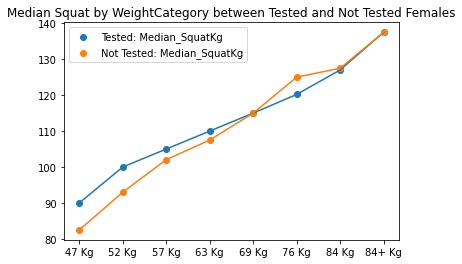

In [54]:
# Visualize squat lifts of tested vs not tested females

# Tested females 
tested_squat_female_weightcategorymedian = tested_all_lifts_female.groupby(['WeightCategory']).agg(Median_SquatKg=('Best3SquatKg', 'median'))
tested_squat_female_weightcategorymedian = tested_squat_female_weightcategorymedian.reset_index()
tested_squat_female_weightcategorymedian = order_female_weightcategories(tested_squat_female_weightcategorymedian)

display(tested_squat_female_weightcategorymedian)
plt.scatter(tested_squat_female_weightcategorymedian['WeightCategory'], tested_squat_female_weightcategorymedian['Median_SquatKg'], label="Tested: Median_SquatKg")
plt.plot(tested_squat_female_weightcategorymedian['WeightCategory'], tested_squat_female_weightcategorymedian['Median_SquatKg'])

# Not tested females
not_tested_squat_female_weightcategorymedian = not_tested_all_lifts_female.groupby(['WeightCategory']).agg(Median_SquatKg=('Best3SquatKg', 'median'))
not_tested_squat_female_weightcategorymedian = not_tested_squat_female_weightcategorymedian.reset_index()
not_tested_squat_female_weightcategorymedian = order_female_weightcategories(not_tested_squat_female_weightcategorymedian)

display(not_tested_squat_female_weightcategorymedian)
plt.scatter(not_tested_squat_female_weightcategorymedian['WeightCategory'], not_tested_squat_female_weightcategorymedian['Median_SquatKg'], label="Not Tested: Median_SquatKg")
plt.plot(not_tested_squat_female_weightcategorymedian['WeightCategory'], not_tested_squat_female_weightcategorymedian['Median_SquatKg'])


# Show legend and title
plt.title("Median Squat by WeightCategory between Tested and Not Tested Females")
plt.legend()
plt.show()

In [55]:
# Find percentage difference in median squat lift between tested and not tested females
squat_testing_combined_female = pd.merge(tested_squat_female_weightcategorymedian, not_tested_squat_female_weightcategorymedian, on="WeightCategory")
squat_testing_combined_female = squat_testing_combined_female.rename(columns={'Median_SquatKg_x':'Tested_Median_SquatKg', 'Median_SquatKg_y':'NotTested_Median_SquatKg'})
squat_testing_combined_female['Pct_Difference'] = round(((squat_testing_combined_female['NotTested_Median_SquatKg'] / squat_testing_combined_female['Tested_Median_SquatKg']) - 1) * 100, 2)
display(squat_testing_combined_female)

,WeightCategory,Tested_Median_SquatKg,NotTested_Median_SquatKg,Pct_Difference
0,47 Kg,90.00,82.50,-8.33
1,52 Kg,100.00,92.99,-7.01
2,57 Kg,105.00,102.06,-2.80
3,63 Kg,110.00,107.50,-2.27
4,69 Kg,115.00,115.00,0.00
5,76 Kg,120.20,125.00,3.99
6,84 Kg,127.01,127.50,0.39
7,84+ Kg,137.50,137.50,0.00


Difference between squat tested vs non tested females

,WeightCategory,Median_BenchKg
3,59 Kg,79.38
4,66 Kg,95.25
5,74 Kg,110.00
6,83 Kg,125.00
7,93 Kg,135.00
0,105 Kg,145.00
1,120 Kg,154.22
2,120+ Kg,165.00


,WeightCategory,Median_BenchKg
3,59 Kg,80.0
4,66 Kg,97.5
5,74 Kg,110.0
6,83 Kg,128.0
7,93 Kg,142.5
0,105 Kg,155.0
1,120 Kg,170.0
2,120+ Kg,187.5


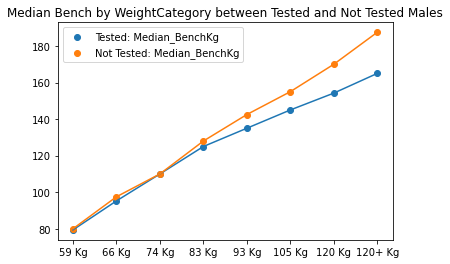

In [56]:
# Visualize bench lifts of tested vs not tested males

# Tested males 
tested_bench_male_weightcategorymedian = tested_all_lifts_male.groupby(['WeightCategory']).agg(Median_BenchKg=('Best3BenchKg', 'median'))
tested_bench_male_weightcategorymedian = tested_bench_male_weightcategorymedian.reset_index()
tested_bench_male_weightcategorymedian = order_male_weightcategories(tested_bench_male_weightcategorymedian)

display(tested_bench_male_weightcategorymedian)
plt.scatter(tested_bench_male_weightcategorymedian['WeightCategory'], tested_bench_male_weightcategorymedian['Median_BenchKg'], label="Tested: Median_BenchKg")
plt.plot(tested_bench_male_weightcategorymedian['WeightCategory'], tested_bench_male_weightcategorymedian['Median_BenchKg'])

# Not tested males
not_tested_bench_male_weightcategorymedian = not_tested_all_lifts_male.groupby(['WeightCategory']).agg(Median_BenchKg=('Best3BenchKg', 'median'))
not_tested_bench_male_weightcategorymedian = not_tested_bench_male_weightcategorymedian.reset_index()
not_tested_bench_male_weightcategorymedian = order_male_weightcategories(not_tested_bench_male_weightcategorymedian)

display(not_tested_bench_male_weightcategorymedian)
plt.scatter(not_tested_bench_male_weightcategorymedian['WeightCategory'], not_tested_bench_male_weightcategorymedian['Median_BenchKg'], label="Not Tested: Median_BenchKg")
plt.plot(not_tested_bench_male_weightcategorymedian['WeightCategory'], not_tested_bench_male_weightcategorymedian['Median_BenchKg'])


# Show legend and title
plt.title("Median Bench by WeightCategory between Tested and Not Tested Males")
plt.legend()
plt.show()

In [57]:
# Find percentage difference in median bench lift between tested and not tested males
bench_testing_combined_male = pd.merge(tested_bench_male_weightcategorymedian, not_tested_bench_male_weightcategorymedian, on="WeightCategory")
bench_testing_combined_male = bench_testing_combined_male.rename(columns={'Median_BenchKg_x':'Tested_Median_BenchKg', 'Median_BenchKg_y':'NotTested_Median_BenchKg'})
bench_testing_combined_male['Pct_Difference'] = round(((bench_testing_combined_male['NotTested_Median_BenchKg'] / bench_testing_combined_male['Tested_Median_BenchKg']) - 1) * 100, 2)
display(bench_testing_combined_male)

,WeightCategory,Tested_Median_BenchKg,NotTested_Median_BenchKg,Pct_Difference
0,59 Kg,79.38,80.0,0.78
1,66 Kg,95.25,97.5,2.36
2,74 Kg,110.00,110.0,0.00
3,83 Kg,125.00,128.0,2.40
4,93 Kg,135.00,142.5,5.56
5,105 Kg,145.00,155.0,6.90
6,120 Kg,154.22,170.0,10.23
7,120+ Kg,165.00,187.5,13.64


Difference between bench tested vs non tested males

,WeightCategory,Median_BenchKg
0,47 Kg,45.36
1,52 Kg,52.50
2,57 Kg,57.50
3,63 Kg,60.00
4,69 Kg,62.50
5,76 Kg,65.00
6,84 Kg,67.50
7,84+ Kg,70.31


,WeightCategory,Median_BenchKg
0,47 Kg,45.0
1,52 Kg,50.0
2,57 Kg,55.0
3,63 Kg,60.0
4,69 Kg,65.0
5,76 Kg,67.5
6,84 Kg,70.0
7,84+ Kg,72.5


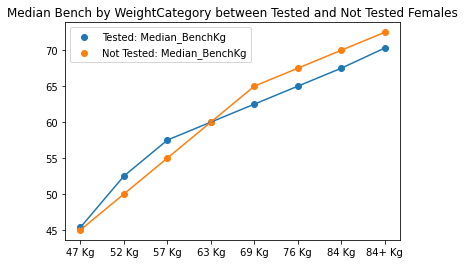

In [58]:
# Visualize bench lifts of tested vs not tested females

# Tested females 
tested_bench_female_weightcategorymedian = tested_all_lifts_female.groupby(['WeightCategory']).agg(Median_BenchKg=('Best3BenchKg', 'median'))
tested_bench_female_weightcategorymedian = tested_bench_female_weightcategorymedian.reset_index()
tested_bench_female_weightcategorymedian = order_female_weightcategories(tested_bench_female_weightcategorymedian)

display(tested_bench_female_weightcategorymedian)
plt.scatter(tested_bench_female_weightcategorymedian['WeightCategory'], tested_bench_female_weightcategorymedian['Median_BenchKg'], label="Tested: Median_BenchKg")
plt.plot(tested_bench_female_weightcategorymedian['WeightCategory'], tested_bench_female_weightcategorymedian['Median_BenchKg'])

# Not tested females
not_tested_bench_female_weightcategorymedian = not_tested_all_lifts_female.groupby(['WeightCategory']).agg(Median_BenchKg=('Best3BenchKg', 'median'))
not_tested_bench_female_weightcategorymedian = not_tested_bench_female_weightcategorymedian.reset_index()
not_tested_bench_female_weightcategorymedian = order_female_weightcategories(not_tested_bench_female_weightcategorymedian)

display(not_tested_bench_female_weightcategorymedian)
plt.scatter(not_tested_bench_female_weightcategorymedian['WeightCategory'], not_tested_bench_female_weightcategorymedian['Median_BenchKg'], label="Not Tested: Median_BenchKg")
plt.plot(not_tested_bench_female_weightcategorymedian['WeightCategory'], not_tested_bench_female_weightcategorymedian['Median_BenchKg'])


# Show legend and title
plt.title("Median Bench by WeightCategory between Tested and Not Tested Females")
plt.legend()
plt.show()

In [59]:
# Find percentage difference in median bench lift between tested and not tested females
bench_testing_combined_female = pd.merge(tested_bench_female_weightcategorymedian, not_tested_bench_female_weightcategorymedian, on="WeightCategory")
bench_testing_combined_female = bench_testing_combined_female.rename(columns={'Median_BenchKg_x':'Tested_Median_BenchKg', 'Median_BenchKg_y':'NotTested_Median_BenchKg'})
bench_testing_combined_female['Pct_Difference'] = round(((bench_testing_combined_female['NotTested_Median_BenchKg'] / bench_testing_combined_female['Tested_Median_BenchKg']) - 1) * 100, 2)
display(bench_testing_combined_female)

,WeightCategory,Tested_Median_BenchKg,NotTested_Median_BenchKg,Pct_Difference
0,47 Kg,45.36,45.0,-0.79
1,52 Kg,52.50,50.0,-4.76
2,57 Kg,57.50,55.0,-4.35
3,63 Kg,60.00,60.0,0.00
4,69 Kg,62.50,65.0,4.00
5,76 Kg,65.00,67.5,3.85
6,84 Kg,67.50,70.0,3.70
7,84+ Kg,70.31,72.5,3.11


Difference between bench tested vs non tested females

,WeightCategory,Median_DeadliftKg
3,59 Kg,147.42
4,66 Kg,175.00
5,74 Kg,195.00
6,83 Kg,213.19
7,93 Kg,226.80
0,105 Kg,235.00
1,120 Kg,240.00
2,120+ Kg,247.50


,WeightCategory,Median_DeadliftKg
3,59 Kg,150.0
4,66 Kg,175.0
5,74 Kg,197.5
6,83 Kg,220.0
7,93 Kg,235.0
0,105 Kg,250.0
1,120 Kg,265.0
2,120+ Kg,280.0


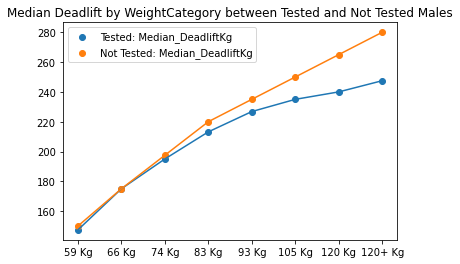

In [60]:
# Visualize deadlift lifts of tested vs not tested males

# Tested males 
tested_deadlift_male_weightcategorymedian = tested_all_lifts_male.groupby(['WeightCategory']).agg(Median_DeadliftKg=('Best3DeadliftKg', 'median'))
tested_deadlift_male_weightcategorymedian = tested_deadlift_male_weightcategorymedian.reset_index()
tested_deadlift_male_weightcategorymedian = order_male_weightcategories(tested_deadlift_male_weightcategorymedian)

display(tested_deadlift_male_weightcategorymedian)
plt.scatter(tested_deadlift_male_weightcategorymedian['WeightCategory'], tested_deadlift_male_weightcategorymedian['Median_DeadliftKg'], label="Tested: Median_DeadliftKg")
plt.plot(tested_deadlift_male_weightcategorymedian['WeightCategory'], tested_deadlift_male_weightcategorymedian['Median_DeadliftKg'])

# Not tested males
not_tested_deadlift_male_weightcategorymedian = not_tested_all_lifts_male.groupby(['WeightCategory']).agg(Median_DeadliftKg=('Best3DeadliftKg', 'median'))
not_tested_deadlift_male_weightcategorymedian = not_tested_deadlift_male_weightcategorymedian.reset_index()
not_tested_deadlift_male_weightcategorymedian = order_male_weightcategories(not_tested_deadlift_male_weightcategorymedian)

display(not_tested_deadlift_male_weightcategorymedian)
plt.scatter(not_tested_deadlift_male_weightcategorymedian['WeightCategory'], not_tested_deadlift_male_weightcategorymedian['Median_DeadliftKg'], label="Not Tested: Median_DeadliftKg")
plt.plot(not_tested_deadlift_male_weightcategorymedian['WeightCategory'], not_tested_deadlift_male_weightcategorymedian['Median_DeadliftKg'])


# Show legend and title
plt.title("Median Deadlift by WeightCategory between Tested and Not Tested Males")
plt.legend()
plt.show()

In [61]:
# Find percentage difference in median deadlift lift between tested and not tested males
deadlift_testing_combined_male = pd.merge(tested_deadlift_male_weightcategorymedian, not_tested_deadlift_male_weightcategorymedian, on="WeightCategory")
deadlift_testing_combined_male = deadlift_testing_combined_male.rename(columns={'Median_DeadliftKg_x':'Tested_Median_DeadliftKg', 'Median_DeadliftKg_y':'NotTested_Median_DeadliftKg'})
deadlift_testing_combined_male['Pct_Difference'] = round(((deadlift_testing_combined_male['NotTested_Median_DeadliftKg'] / deadlift_testing_combined_male['Tested_Median_DeadliftKg']) - 1) * 100, 2)
display(deadlift_testing_combined_male)

,WeightCategory,Tested_Median_DeadliftKg,NotTested_Median_DeadliftKg,Pct_Difference
0,59 Kg,147.42,150.0,1.75
1,66 Kg,175.00,175.0,0.00
2,74 Kg,195.00,197.5,1.28
3,83 Kg,213.19,220.0,3.19
4,93 Kg,226.80,235.0,3.62
5,105 Kg,235.00,250.0,6.38
6,120 Kg,240.00,265.0,10.42
7,120+ Kg,247.50,280.0,13.13


Difference between deadlift tested vs non tested males

,WeightCategory,Median_DeadliftKg
0,47 Kg,102.50
1,52 Kg,115.00
2,57 Kg,122.47
3,63 Kg,127.50
4,69 Kg,131.54
5,76 Kg,138.35
6,84 Kg,142.50
7,84+ Kg,145.00


,WeightCategory,Median_DeadliftKg
0,47 Kg,105.000
1,52 Kg,115.670
2,57 Kg,124.740
3,63 Kg,130.000
4,69 Kg,138.175
5,76 Kg,147.420
6,84 Kg,150.000
7,84+ Kg,152.500


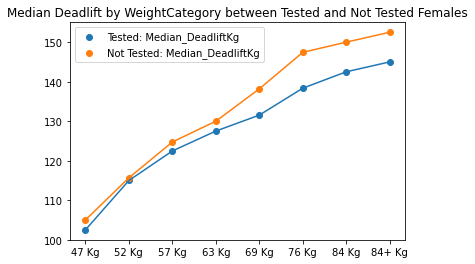

In [62]:
# Visualize deadlift lifts of tested vs not tested females

# Tested females 
tested_deadlift_female_weightcategorymedian = tested_all_lifts_female.groupby(['WeightCategory']).agg(Median_DeadliftKg=('Best3DeadliftKg', 'median'))
tested_deadlift_female_weightcategorymedian = tested_deadlift_female_weightcategorymedian.reset_index()
tested_deadlift_female_weightcategorymedian = order_female_weightcategories(tested_deadlift_female_weightcategorymedian)

display(tested_deadlift_female_weightcategorymedian)
plt.scatter(tested_deadlift_female_weightcategorymedian['WeightCategory'], tested_deadlift_female_weightcategorymedian['Median_DeadliftKg'], label="Tested: Median_DeadliftKg")
plt.plot(tested_deadlift_female_weightcategorymedian['WeightCategory'], tested_deadlift_female_weightcategorymedian['Median_DeadliftKg'])

# Not tested females
not_tested_deadlift_female_weightcategorymedian = not_tested_all_lifts_female.groupby(['WeightCategory']).agg(Median_DeadliftKg=('Best3DeadliftKg', 'median'))
not_tested_deadlift_female_weightcategorymedian = not_tested_deadlift_female_weightcategorymedian.reset_index()
not_tested_deadlift_female_weightcategorymedian = order_female_weightcategories(not_tested_deadlift_female_weightcategorymedian)

display(not_tested_deadlift_female_weightcategorymedian)
plt.scatter(not_tested_deadlift_female_weightcategorymedian['WeightCategory'], not_tested_deadlift_female_weightcategorymedian['Median_DeadliftKg'], label="Not Tested: Median_DeadliftKg")
plt.plot(not_tested_deadlift_female_weightcategorymedian['WeightCategory'], not_tested_deadlift_female_weightcategorymedian['Median_DeadliftKg'])


# Show legend and title
plt.title("Median Deadlift by WeightCategory between Tested and Not Tested Females")
plt.legend()
plt.show()

In [63]:
# Find percentage difference in median deadlift lift between tested and not tested females
deadlift_testing_combined_female = pd.merge(tested_deadlift_female_weightcategorymedian, not_tested_deadlift_female_weightcategorymedian, on="WeightCategory")
deadlift_testing_combined_female = deadlift_testing_combined_female.rename(columns={'Median_DeadliftKg_x':'Tested_Median_DeadliftKg', 'Median_DeadliftKg_y':'NotTested_Median_DeadliftKg'})
deadlift_testing_combined_female['Pct_Difference'] = round(((deadlift_testing_combined_female['NotTested_Median_DeadliftKg'] / deadlift_testing_combined_female['Tested_Median_DeadliftKg']) - 1) * 100, 2)
display(deadlift_testing_combined_female)

,WeightCategory,Tested_Median_DeadliftKg,NotTested_Median_DeadliftKg,Pct_Difference
0,47 Kg,102.50,105.000,2.44
1,52 Kg,115.00,115.670,0.58
2,57 Kg,122.47,124.740,1.85
3,63 Kg,127.50,130.000,1.96
4,69 Kg,131.54,138.175,5.04
5,76 Kg,138.35,147.420,6.56
6,84 Kg,142.50,150.000,5.26
7,84+ Kg,145.00,152.500,5.17


Difference between deadlift tested vs non tested males

In [64]:
# Collect all percentage differences into one table for males
combined_male_percentages = pd.DataFrame()
combined_male_percentages['WeightCategory'] = all_lifts_testing_combined_male['WeightCategory']
combined_male_percentages['Pct_Difference_MedianTotalKg'] = all_lifts_testing_combined_male['Pct_Difference']
combined_male_percentages['Pct_Difference_MedianSquatKg'] = squat_testing_combined_male['Pct_Difference']
combined_male_percentages['Pct_Difference_MedianBenchKg'] = bench_testing_combined_male['Pct_Difference']
combined_male_percentages['Pct_Difference_MedianDeadliftKg'] = deadlift_testing_combined_male['Pct_Difference']

display(combined_male_percentages)

,WeightCategory,Pct_Difference_MedianTotalKg,Pct_Difference_MedianSquatKg,Pct_Difference_MedianBenchKg,Pct_Difference_MedianDeadliftKg
0,59 Kg,-0.93,-4.05,0.78,1.75
1,66 Kg,-1.18,-3.28,2.36,0.00
2,74 Kg,-0.30,-1.37,0.00,1.28
3,83 Kg,2.83,2.63,2.40,3.19
4,93 Kg,4.42,3.33,5.56,3.62
5,105 Kg,6.25,5.64,6.90,6.38
6,120 Kg,9.56,8.07,10.23,10.42
7,120+ Kg,13.01,12.00,13.64,13.13


We can see all lifts collected for tested vs non tested males

In [65]:
# Collect all percentage differences into one table for females
combined_female_percentages = pd.DataFrame()
combined_female_percentages['WeightCategory'] = all_lifts_testing_combined_female['WeightCategory']
combined_female_percentages['Pct_Difference_MedianTotalKg'] = all_lifts_testing_combined_female['Pct_Difference']
combined_female_percentages['Pct_Difference_MedianSquatKg'] = squat_testing_combined_female['Pct_Difference']
combined_female_percentages['Pct_Difference_MedianBenchKg'] = bench_testing_combined_female['Pct_Difference']
combined_female_percentages['Pct_Difference_MedianDeadliftKg'] = deadlift_testing_combined_female['Pct_Difference']

display(combined_female_percentages)

,WeightCategory,Pct_Difference_MedianTotalKg,Pct_Difference_MedianSquatKg,Pct_Difference_MedianBenchKg,Pct_Difference_MedianDeadliftKg
0,47 Kg,-1.32,-8.33,-0.79,2.44
1,52 Kg,-1.91,-7.01,-4.76,0.58
2,57 Kg,-0.35,-2.80,-4.35,1.85
3,63 Kg,0.13,-2.27,0.00,1.96
4,69 Kg,3.68,0.00,4.00,5.04
5,76 Kg,4.62,3.99,3.85,6.56
6,84 Kg,2.96,0.39,3.70,5.26
7,84+ Kg,2.84,0.00,3.11,5.17


We can see all lifts collected for tested vs non tested females

## Predictive model to estimate maximum lifts

We will train a predictive model to estimate a person's bench, squat, and deadlift based on inputs such as gender, age, and bodyweight.

In [66]:
# TO DO: Create a predictive model